# Stochastic model

- This simplified 2D discrete-continuum synthetic stochastic model is used to test the coupling between pyKasso and CFPy. Its purpose is to replicate both the conduit network and the synthetic observation data from the prior model (without calibration).

- Moreover, in this example, distinct hydraulic and physical parameters are employed in contrast to those of the synthetic reference system. Through an automated calibration process, these parameters can be estimated and subsequently compared to the reference values.

In [1]:
# Load packages
%run "00_Packages.py"

c:\Users\Marcus\.conda\envs\cfpy_env\lib\site-packages\mplstereonet\stereonet_axes.py:17: PendingDeprecationWarning: Overriding `Axes.cla` in StereonetAxes is pending deprecation in 3.6 and will be fully deprecated in favor of `Axes.clear` in the future. Please report this to the 'mplstereonet.stereonet_axes' author.
  class StereonetAxes(LambertAxes):


In [2]:
# Load matplotlib stylesheet
plt.style.use('stylesheet.mplstyle')

## Folder and file structure

### Create folders and paths

In [3]:
# Define current directory as main directory variable
main_dir = os.getcwd()
print('Main Directory:', main_dir)

Main Directory: c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\notebooks


In [4]:
# Create the folder structure
# Define folder und subfolder names
folders = ['01_data', '02_model', '03_results']
subfolders = [['rst', 'shp', 'csv','xlsx', 'txt'],
                     ['mf_syn', 'mf_stoch', 'gis', ],
                     ['shp', 'img', 'pdf', 'rst', 'gif']]
# Define folders class 
folders = Folders_c(main_dir = main_dir, folders = folders,
                    subfolders = subfolders)
# Generate the folders
folders.create_folders()

Folders were generated


### Define paths

In [5]:
# Save all paths to the folders in a dictionary
p_folders = folders.path_folders()

### Read and list all files

In [6]:
# List all files in the folder '01_data'
d_files = Files_c(main_dir = main_dir, folders = ['01_data'],
                  subfolders = subfolders[0:1])
# Create a dictionary with all files (key) and corresponding path (value) 
d_files.dict_all_files()

{'Alluvial Aquifer.cpg': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\\notebooks\\01_data\\shp\\Alluvial Aquifer.cpg',
 'Alluvial Aquifer.dbf': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\\notebooks\\01_data\\shp\\Alluvial Aquifer.dbf',
 'Alluvial Aquifer.prj': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\\notebooks\\01_data\\shp\\Alluvial Aquifer.prj',
 'Alluvial Aquifer.shp': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\\notebooks\\01_data\\shp\\Alluvial Aquifer.shp',
 'Alluvial Aquifer.shx': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\\notebooks\\01_data\\shp\\Alluvial Aquifer.shx',
 'Catchment_gwr_karst.cpg': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_s

In [7]:
# Read all files in the folder '01_data'
d_dict = read_all_files(d_files.dict_all_files())
# Show all keys of the dictionary
d_dict.keys()

Alluvial Aquifer.shp
Catchment_gwr_karst.shp
Conduits.shp
Inlets.shp


Interaction.shp
Isohypse.shp
Karst Aquifer.shp
Karst conduit.shp
Karst.shp
Matrix.shp
Observations.shp
Outlets.shp
Study_site.shp
Well MAR.shp
geo40x48.csv
Par_stoch.xlsx
Par_syn.xlsx
RCH.xlsx


dict_keys(['Alluvial Aquifer', 'Alluvial Aquifer-001', 'Catchment_gwr_karst', 'Catchment_gwr_karst-001', 'Catchment_gwr_karst-002', 'Catchment_gwr_karst-003', 'Conduits', 'Conduits-001', 'Conduits-002', 'Conduits-003', 'Inlets', 'Inlets-001', 'Inlets-002', 'Inlets-003', 'Interaction', 'Interaction-001', 'Isohypse', 'Isohypse-001', 'Karst Aquifer', 'Karst Aquifer-001', 'Karst conduit', 'Karst conduit-001', 'Karst', 'Karst-001', 'Matrix', 'Matrix-001', 'Matrix-002', 'Observations', 'Observations-001', 'Observations-002', 'Observations-003', 'Observations-004', 'Observations-005', 'Outlets', 'Outlets-001', 'Study_site', 'Study_site-001', 'Well MAR', 'Well MAR-001', 'geo40x48', 'Par_stoch', 'Par_syn', 'RCH'])

# Set up and configure the FloPy model

In [8]:
# Model name and workspace
modelname = "mf_stoch"
model_ws = os.path.join(p_folders['02_model_mf_stoch'])
# Define the MODFLOW model
mf = flopy.modflow.Modflow(modelname, exe_name="CFPv2.exe",
                           verbose=True, model_ws=model_ws)

### Parameters

In [9]:
'''Overview of parameters'''
# replace NaN values with empty strings
d_dict['Par_stoch'].fillna('', inplace=True)
# Set column 'Parameter name' as the index
d_dict['Par_stoch-i'] = d_dict['Par_stoch'].set_index('Parameter name')

In [10]:
# Show the parameters of the model
d_dict['Par_stoch-i']

,Initial value,Unit,Additional Information,Category
Parameter name,,,,
Model domain,,,,Discretization
Spatial discretization,,,,Discretization
Length unit,Meters,,,Discretization
Time unit,Seconds,,,Discretization
Easting dimension,1200,L,,Discretization
Northing dimension,1000,L,,Discretization
Global grid size,25,L,Global Refinement (cell x and y dimension will...,Discretization
Number of columns,48,-,,Discretization
Number of rows,40,-,,Discretization


## Model grid & discretization - DIS

### Unit

In [11]:
# length unit 
lenuni = d_dict['Par_stoch-i']['Initial value']['Length unit'] # "Meters" # 2
print('Length unit:', lenuni)

# time units: 1=seconds, 2=minutes, 3=hours, 4=days
itmuni = d_dict['Par_stoch-i']['Initial value']['Time unit'] # "Seconds" # 1
print('Time unit:', itmuni)

Length unit: Meters
Time unit: Seconds


### Spatial DIS 

In [12]:
# Study site/area polygon
shp_ss = d_dict['Study_site']

In [13]:
# Defining Global Refinements (cell x and y dimension will be the same)
celGlo = d_dict['Par_stoch-i']['Initial value']['Global grid size'] # meters
# Calculating Global Model (Glo) (Extent of the model grid)
GloRefBox = shp_ss.bounds
print('Data of GloRefBox:\n', GloRefBox, '\n')
# Calculating the number of rows and columns
GloLx = GloRefBox['maxx'][0] - GloRefBox['minx'][0] #x_max - x_min
GloLy = GloRefBox['maxy'][0] - GloRefBox['miny'][0] #y_max - y_min
nrow = math.ceil(GloLy/celGlo)
ncol = math.ceil(GloLx/celGlo)
print('Number of rows: %d and number of cols: %d' % (nrow,ncol))
# Calculating the cell size along row and column
delr = np.array([celGlo]*ncol)
delc = np.array([celGlo]*nrow)
print('Grid cell size along row:\n', delr)
print('Grid cell size along col:\n', delc)

Data of GloRefBox:
             minx          miny           maxx          maxy
0  320857.338297  3.982013e+06  322057.338297  3.983013e+06 

Number of rows: 40 and number of cols: 48
Grid cell size along row:
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]
Grid cell size along col:
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]


In [14]:
# Number of layers
nlay = 1

### Time DIS

In [15]:
'''Time discretization''' 
# time units: 1=seconds, 2=minutes, 3=hours, 4=days
# itmuni = 1
itmuni = itmuni
print('Time unit: 1=seconds')
# number of stress periods
nper = d_dict['Par_stoch-i']['Initial value']['Number of stress periods']
print('Number of stress periods:', nper)
# length of stress periods
# this variable assumes a uniform time discretization, i.e. all stress periods
# have the same number of time steps except the first stationary time step
perlen = d_dict['Par_stoch-i']['Initial value']['Length of stress periods'] 
print('Length of stress periods:', itmuni)
# number of time steps in each stress period (integer array)
n_stps = np.ones(nper)
n_stps = n_stps.tolist()
# ensure that fist stress period (stationary) has length 1
n_stps[0] = 1.0
print('\nNumber of timesteps in each stress period:',n_stps)
# list with "False" everywhere except 0th element (which is "True")
# to specify steady state ("True") or transient ("False")
steady = np.zeros(nper, dtype=np.bool_)
# ensure stationary first stress period
steady[0] = 1
print('\nSpecify steady state ("True" = 1) or transient ("False" = 0):\n', steady)

Time unit: 1=seconds
Number of stress periods: 48
Length of stress periods: Seconds

Number of timesteps in each stress period: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Specify steady state ("True" = 1) or transient ("False" = 0):
 [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


### Projection of DIS 

- Define coordinate reference system (CRS) of the model

In [16]:
# Get the projection of the shapefile
Proj_crs = pyproj.CRS(shp_ss.crs).to_epsg()
Proj_crs

32637

### Write DIS

In [17]:
# Define the discretization of the model
dis = flopy.modflow.ModflowDis(model = mf, nrow = nrow, ncol = ncol,
                               nper = nper, delr = delr, delc = delc, 
                               nlay = nlay, # top = top, botm = botm,
                               perlen=perlen, nstp=n_stps, steady=steady,
                               itmuni=itmuni, lenuni=lenuni,
                               xul= GloRefBox['minx'][0], 
                               yul= GloRefBox['maxy'][0],
                               rotation = 0,
                               crs = Proj_crs,
                               start_datetime = datetime.now().strftime('%m/%d/%Y'))

adding Package:  DIS


### Model DIS - Update (Layer top and bottom elevation) 

In [18]:
# Model top
top = np.ones((mf.dis.nrow, mf.dis.ncol)) 
top = top * d_dict['Par_stoch-i']['Initial value']['Model top']
# Overwrite the top of the model
mf.dis.top = top

In [19]:
# Model bottom
botm = np.ones((mf.dis.nrow, mf.dis.ncol))
botm = botm * eval(d_dict['Par_stoch-i']['Initial value']['Model bottom'])
# Overwrite the bottom of the model
mf.dis.botm = botm

### Plot grid layer top and bottom

plotting DIS package Util2d instance: top
plotting DIS package Util3d instance: botm


[<Axes: title={'center': ' model_top'}>,
 <Axes: title={'center': 'botm Layer  layer 1'}>]

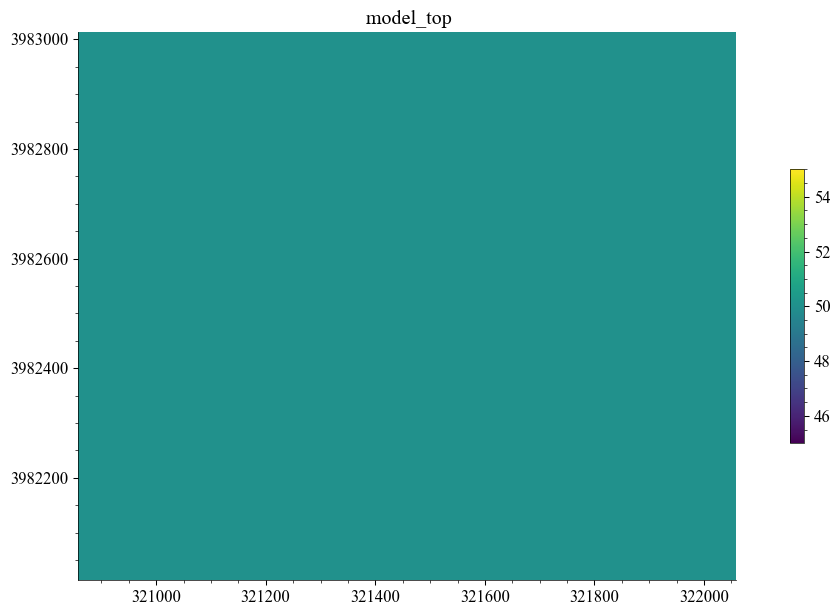

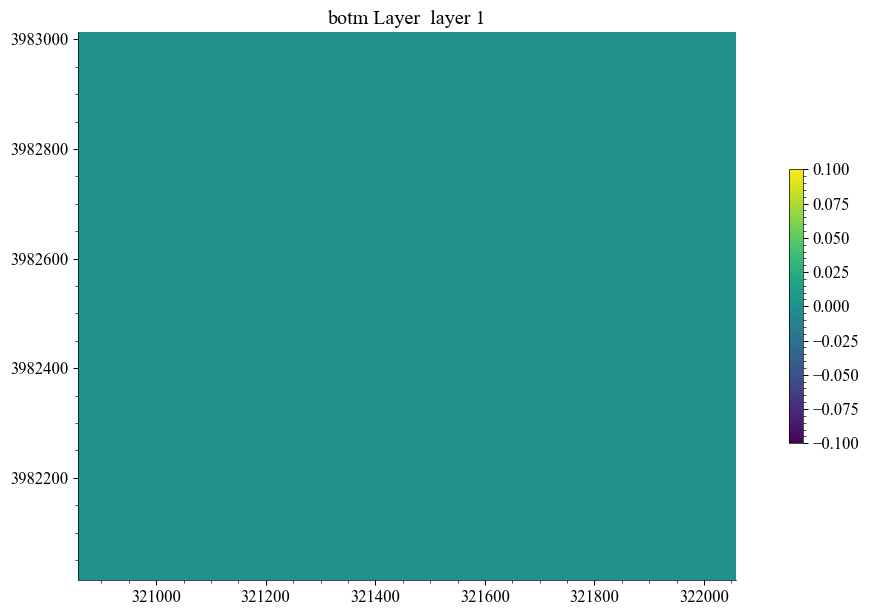

In [20]:
# Plot the elevation of the model grid
dis.plot(colorbar=True)

### Intersect and locate features within grid

In [21]:
# Create the intersection object
ix = GridIntersect(mf.modelgrid, method="vertex")
# Save the intesected files in a temporary dictionary
d_dict_temp = grid_ix(ix = ix, data_dict = d_dict, s_key='', 
                         single_features = True)

Alluvial Aquifer ['Polygon']
Alluvial Aquifer-001 ['Polygon']
Catchment_gwr_karst-001 ['Polygon']
Catchment_gwr_karst-002 ['Polygon']
Catchment_gwr_karst-003 ['Polygon']
Conduits-001 ['LineString']
Conduits-002 ['LineString']
Conduits-003 ['LineString']
Inlets-001 ['Point']
Inlets-002 ['Point']
Inlets-003 ['Point']
Interaction ['LineString']
Interaction-001 ['LineString']
Isohypse ['LineString']
Isohypse-001 ['LineString']
Karst Aquifer ['Polygon']
Karst Aquifer-001 ['Polygon']
Karst conduit ['Point']
Karst conduit-001 ['Point']
Karst ['Point']
Karst-001 ['Point']
Matrix-001 ['Point']
Matrix-002 ['Point']
Observations-001 ['Point']
Observations-002 ['Point']
Observations-003 ['Point']
Observations-004 ['Point']
Observations-005 ['Point']
Outlets ['Point']
Outlets-001 ['Point']
Study_site ['Polygon']
Study_site-001 ['Polygon']
Well MAR ['Point']
Well MAR-001 ['Point']
Error in geo40x48, probably no shapefile/geometry. Is this maybe a raster file or an alredy existing intersection datase

In [22]:
# Show the keys of the temporary dictionary (ending with '-ix')
d_dict_temp.keys()

dict_keys(['Alluvial Aquifer-ix', 'Alluvial Aquifer-001-ix', 'Catchment_gwr_karst-001-ix', 'Catchment_gwr_karst-002-ix', 'Catchment_gwr_karst-003-ix', 'Conduits-001-ix', 'Conduits-002-ix', 'Conduits-003-ix', 'Inlets-001-ix', 'Inlets-002-ix', 'Inlets-003-ix', 'Interaction-ix', 'Interaction-001-ix', 'Isohypse-ix', 'Isohypse-001-ix', 'Karst Aquifer-ix', 'Karst Aquifer-001-ix', 'Karst conduit-ix', 'Karst conduit-001-ix', 'Karst-ix', 'Karst-001-ix', 'Matrix-001-ix', 'Matrix-002-ix', 'Observations-001-ix', 'Observations-002-ix', 'Observations-003-ix', 'Observations-004-ix', 'Observations-005-ix', 'Outlets-ix', 'Outlets-001-ix', 'Study_site-ix', 'Study_site-001-ix', 'Well MAR-ix', 'Well MAR-001-ix'])

In [23]:
# Write the keys and values of the temporary dictionary to the data dictionary
for key,value in d_dict_temp.items():
    print(key)
    d_dict[key] = value
# Write the cellids objects to the data dictionary
for key,value in d_dict_temp.items():
    if '-ix' in key:
        d_dict[key+'-cid'] = value['cellids']
        print(key+'-cid')

Alluvial Aquifer-ix
Alluvial Aquifer-001-ix
Catchment_gwr_karst-001-ix
Catchment_gwr_karst-002-ix
Catchment_gwr_karst-003-ix
Conduits-001-ix
Conduits-002-ix
Conduits-003-ix
Inlets-001-ix
Inlets-002-ix
Inlets-003-ix
Interaction-ix
Interaction-001-ix
Isohypse-ix
Isohypse-001-ix
Karst Aquifer-ix
Karst Aquifer-001-ix
Karst conduit-ix
Karst conduit-001-ix
Karst-ix
Karst-001-ix
Matrix-001-ix
Matrix-002-ix
Observations-001-ix
Observations-002-ix
Observations-003-ix
Observations-004-ix
Observations-005-ix
Outlets-ix
Outlets-001-ix
Study_site-ix
Study_site-001-ix
Well MAR-ix
Well MAR-001-ix
Alluvial Aquifer-ix-cid
Alluvial Aquifer-001-ix-cid
Catchment_gwr_karst-001-ix-cid
Catchment_gwr_karst-002-ix-cid
Catchment_gwr_karst-003-ix-cid
Conduits-001-ix-cid
Conduits-002-ix-cid
Conduits-003-ix-cid
Inlets-001-ix-cid
Inlets-002-ix-cid
Inlets-003-ix-cid
Interaction-ix-cid
Interaction-001-ix-cid
Isohypse-ix-cid
Isohypse-001-ix-cid
Karst Aquifer-ix-cid
Karst Aquifer-001-ix-cid
Karst conduit-ix-cid
Karst c

### Plot grid and spatial features

In [24]:
def plot_system(ax):
    # Plot the grid, points, lines and polygon features of the system
    # Grid
    mf.modelgrid.plot(ax=ax, linewidth=0.5, color="black")
    # Lines
    d_dict['Isohypse'].plot(ax=ax, linewidth = 3, color = 'blue', label='Isohypse')
    d_dict['Conduits'].plot(ax=ax, linewidth = 3, color = 'brown',label='Conduit') 
    # Polygon
    d_dict['Alluvial Aquifer'].plot(ax=ax, color="darkred", alpha = 0.25)
    d_dict['Karst Aquifer'].plot(ax=ax, color="gray", alpha = 0.25)
    d_dict['Catchment_gwr_karst'].plot(ax=ax, color="lightblue", alpha = 1.0)
    # Points
    d_dict['Observations'].plot(ax=ax, color="orange", markersize=50, label='Obs')
    d_dict['Observations'][d_dict['Observations']['Karst']=='Conduit'].plot(ax=ax, color="black", markersize=20, label='Conduit')
    d_dict['Inlets'].plot(ax=ax, color="navy", markersize=50, label='Inlets')
    d_dict['Outlets'].plot(ax=ax, color="red", markersize=50, label='Outlets')
    # Define the label and legend
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.legend()

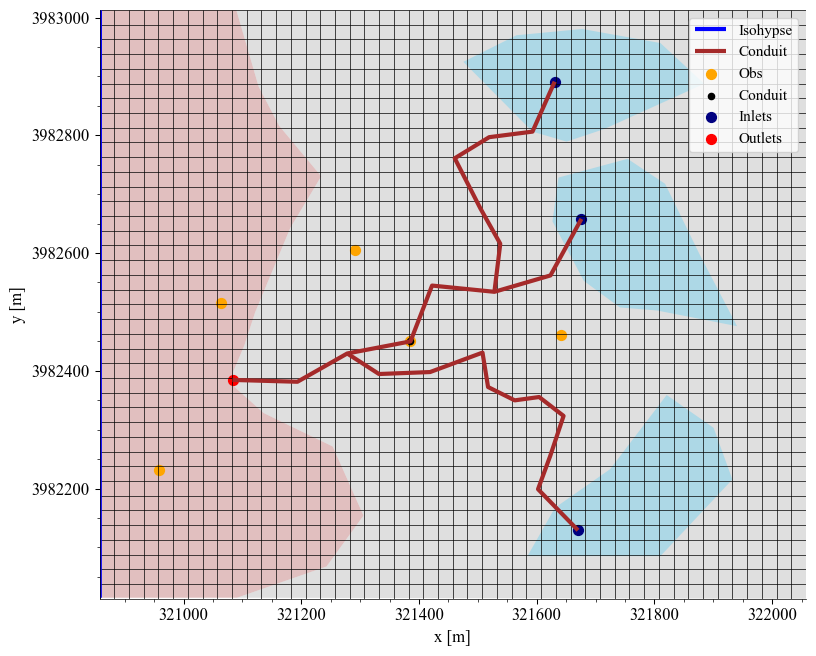

In [25]:
# Plot the system
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_system(ax=ax)

In [26]:
# Show the observtion dictionary
d_dict['Observations']

,Name,Elev[m],Karst,geometry
0,obs1,5.0,No,POINT (320957.926 3982232.215)
1,obs2,5.0,No,POINT (321063.706 3982515.272)
2,obs3,5.0,Matrix,POINT (321291.971 3982605.634)
3,obs4,5.0,Conduit,POINT (321385.531 3982449.929)
4,obs5,5.0,Matrix,POINT (321640.840 3982461.270)


# Pykasso - yaml

- It is advisable to avoid placing inlets and outlets directly at the corners or the minimum/maximum points of the model boundary.

In [27]:
# For this a settings.yaml should be inside the main_dir
os.chdir(main_dir)
# Open the settings.yaml file
with open('settings.yaml') as f:
    yaml_data = yaml.load(f, Loader=Loader)

In [28]:
# Show the yaml data / settings
yaml_data

{'x0': 5,
 'y0': 5,
 'xnum': 9,
 'ynum': 9,
 'dx': 10,
 'dy': 10,
 'data_has_polygon': False,
 'polygon_data': 'inputs/example/polygon.txt',
 'outlets_mode': 'random',
 'outlets_data': 'inputs/example/outlet2D.txt',
 'outlets_number': 1,
 'outlets_shuffle': False,
 'outlets_importance': [1],
 'inlets_mode': 'random',
 'inlets_data': 'inputs/example/inlet2D.txt',
 'inlets_number': 1,
 'inlets_shuffle': False,
 'inlets_per_outlet': [4],
 'inlets_importance': [1],
 'geological_mode': 'null',
 'geological_datafile': 'inputs/example/geo9x9.csv',
 'topography_mode': 'null',
 'topography_datafile': 'inputs/example/dem9x9.csv',
 'orientation_mode': 'topo',
 'orientation_datafile': 'inputs/example/contact9x9.csv',
 'faults_mode': 'null',
 'faults_datafile': 'None',
 'fractures_mode': 'random',
 'fractures_datafile': 'None',
 'fractures_densities': [5.83e-05,
  1.38e-05,
  2.22e-05,
  2.5e-05,
  4.16e-05,
  6.66e-05,
  '5e-5'],
 'fractures_min_orientation': [0, 15, 30, 60, 105, 120, 150],
 'frac

In [29]:
'''Grid'''
# Define the grid x and y origin
yaml_data['x0'] = GloRefBox['minx'][0]
yaml_data['y0'] = GloRefBox['miny'][0] 
# Define the number of rows and columns
yaml_data['xnum'] = mf.dis.ncol
yaml_data['ynum'] = mf.dis.nrow
# Define the cell size along row and column
yaml_data['dx'] = celGlo
yaml_data['dy'] = celGlo
# Print the grid settings
print('x0   :',yaml_data['x0']) # x0
print('y0   :',yaml_data['y0']) # y0
print('xnum :',mf.dis.ncol)
print('ynum :',mf.dis.nrow)
print('dx   :',celGlo)
print('dy   :',celGlo)

x0   : 320857.338297
y0   : 3982012.811685344
xnum : 48
ynum : 40
dx   : 25
dy   : 25


In [30]:
# yaml files have problems with numpy data types --> turn it into a list 
yaml_data['x0'] = yaml_data['x0'].item()
yaml_data['y0'] = yaml_data['y0'].item()

In [31]:
'''Inlets'''
# Define the spatial location of inlets for grid starting at (0,0)
a = []
for nr in range(d_dict['Inlets'].shape[0]):
    x = (d_dict[f'Inlets-{nr+1:03d}-ix']['ixshapes'][0].x) 
    y = (d_dict[f'Inlets-{nr+1:03d}-ix']['ixshapes'][0].y) 
    a.append([x.item(),y.item()])
# Define the inlets mode, data, number and per outlet
yaml_data['inlets_mode'] = 'import'
yaml_data['inlets_data'] = a
yaml_data['inlets_number'] = len(a)
yaml_data['inlets_per_outlet'] = [len(a)]
# Print the inlets data
print("inlets_mode   : 'import'")
print('inlets_yaml_data   :', a)
print('inlets_number :', len(a))

inlets_mode   : 'import'
inlets_yaml_data   : [[321675.8808981737, 3982657.975235402], [321630.4656857662, 3982891.092673218], [321670.07556450844, 3982129.0740536056]]
inlets_number : 3


In [32]:
'''Outlets'''
# Define the spatial location of outlets for grid starting at (0,0)
a = []
for nr in range(d_dict['Outlets'].shape[0]):
    x = (d_dict[f'Outlets-{nr+1:03d}-ix']['ixshapes'][0].x) 
    y = (d_dict[f'Outlets-{nr+1:03d}-ix']['ixshapes'][0].y) 
    a.append([x.item(),y.item()])
# Define the outlets mode, data and number
yaml_data['outlets_mode'] = 'import'
yaml_data['outlets_data'] = a
yaml_data['outlets_number'] = len(a)
# Print the outlets data
print("outlets_mode   : 'import'")
print('outlets_yaml_data   :', a)
print('outlets_number :', len(a))

outlets_mode   : 'import'
outlets_yaml_data   : [[321083.308854461, 3982384.4707279983]]
outlets_number : 1


In [33]:
# Define the extent of the karst system (Polygon)
# Ensure that only conduits are generated within that region
# Read the shapefile of the karst system
cord_karst_aquifer = sf.Reader(p_folders['01_data_shp'] + '/Karst Aquifer.shp')
# Get the first feature (assumes there is at least one feature)
feature = cord_karst_aquifer.shapeRecords()[0]
# Get the geometry object for the feature
geom = feature.shape.__geo_interface__
# Create a shapely Polygon object from the geometry
poly = Polygon(geom['coordinates'][0])
# Access the x and y coordinates of each point in the polygon
with open(os.path.join(p_folders['01_data_txt'] ,'polygon.txt'), 'w') as f:
    for point in poly.exterior.coords:
        x, y = point
        # Write to text file
        f.write('{} {}\n'.format(x-1, y))

In [34]:
# Define the polygon mode and data in the yaml file
yaml_data['data_has_polygon'] = True
yaml_data['polygon_data'] = os.path.join(p_folders['01_data_txt'] ,
                                         'polygon.txt')

In [35]:
'''Fractures'''
# Define additional informations about fractures
yaml_data['fractures_densities'] = ast.literal_eval(d_dict['Par_stoch-i']['Initial value']['Fracture density'])
yaml_data['fractures_min_orientation'] = ast.literal_eval(d_dict['Par_stoch-i']['Initial value']['Fracture minimum orientation'])
yaml_data['fractures_max_orientation'] = ast.literal_eval(d_dict['Par_stoch-i']['Initial value']['Fracture maximum orientation'])
# Print the informations about fractures
print("Fracture density   :", yaml_data['fractures_densities'])
print('Fracture minimum orientation   :', yaml_data['fractures_min_orientation'])
print('Fracture maximum orientation :', yaml_data['fractures_max_orientation'])


Fracture density   : [2.5e-05, 2e-05]
Fracture minimum orientation   : [15, 75]
Fracture maximum orientation : [30, 90]


In [36]:
'''Geology csv'''
# Define the geology csv file
# Create an 2D array with ones
geology = np.ones((mf.dis.nrow, mf.dis.ncol))
# Define the karst and matrix values
karst = 1
alluvial = 0
# Assign the karst and matrix values to the geology array
# Alluvial aquifer
for nr in range(d_dict['Alluvial Aquifer'].shape[0]):
    for cell in d_dict[f'Alluvial Aquifer-{nr+1:03d}-ix-cid']:
        row,col = cell
        geology[mf.dis.nrow -1 - row, col] = alluvial
# Karst matrix
for nr in range(d_dict['Karst Aquifer'].shape[0]):
    for cell in d_dict[f'Karst Aquifer-{nr+1:03d}-ix-cid']:
        row,col = cell
        geology[mf.dis.nrow -1 - row, col] = karst
# Change the data type to integer
geology = geology.astype('int')
# Print the geology array
print(geology)
# Write the geology array to a csv file
with open(os.path.join(p_folders['01_data_csv'],
                       'geo{}x{}.csv'.format(mf.dis.nrow,mf.dis.ncol)), mode="w", newline="") as file:
    # Create a CSV writer object
    writer = csv.writer(file)
    # Write each item in the list as a separate row
    for row in geology:
        writer.writerow(row)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [37]:
'''Geology import'''
# Assign the geology id and cost to the yaml file
yaml_data['geology_id'] = [0,1,2,3]
yaml_data['geology_cost'] =  ['cost_out', 'cost_aquifer', 'cost_aquiclude', 'cost_conduits']
# Define the geology mode and data in the yaml file
yaml_data['geological_mode'] = 'csv'
yaml_data['geological_datafile'] = os.path.join(p_folders['01_data_csv'], 'geo{}x{}.csv'.format(mf.dis.nrow,mf.dis.ncol))

In [38]:
'''Random shuffle of network geometry'''
# Define the random seed
yaml_data['rand_seed'] = 0
'''Isotropic or anisotropic'''
# Define the algorithm to generate the network
yaml_data['algorithm'] = 'Riemann2'  # 'Riemann2' # 'Isotropic2'

In [39]:
# Show the modified yaml data / settings
yaml_data

{'x0': 320857.338297,
 'y0': 3982012.811685344,
 'xnum': 48,
 'ynum': 40,
 'dx': 25,
 'dy': 25,
 'data_has_polygon': True,
 'polygon_data': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\\notebooks\\01_data\\txt\\polygon.txt',
 'outlets_mode': 'import',
 'outlets_data': [[321083.308854461, 3982384.4707279983]],
 'outlets_number': 1,
 'outlets_shuffle': False,
 'outlets_importance': [1],
 'inlets_mode': 'import',
 'inlets_data': [[321675.8808981737, 3982657.975235402],
  [321630.4656857662, 3982891.092673218],
  [321670.07556450844, 3982129.0740536056]],
 'inlets_number': 3,
 'inlets_shuffle': False,
 'inlets_per_outlet': [3],
 'inlets_importance': [1],
 'geological_mode': 'csv',
 'geological_datafile': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\\notebooks\\01_data\\csv\\geo40x48.csv',
 'topography_mode': 'null',
 'topography_datafile': 'inputs/example/dem9x9.csv',
 'orienta

## Check modified yaml file

In [40]:
'''Open and read yaml file'''
with open('settings_modified.yaml', 'w') as f:
    yaml.dump(yaml_data, f, default_flow_style=False)
#Load model:    
yaml_file = pk.SKS(yaml_settings_file = 'settings_modified.yaml')

CAUTION: You are using the development version of this package.
- inspect_polygon() - Warning : 4 vertices not inside the grid limits on 19 vertices.
- vertice 1
- vertice 2
- vertice 3
- vertice 19


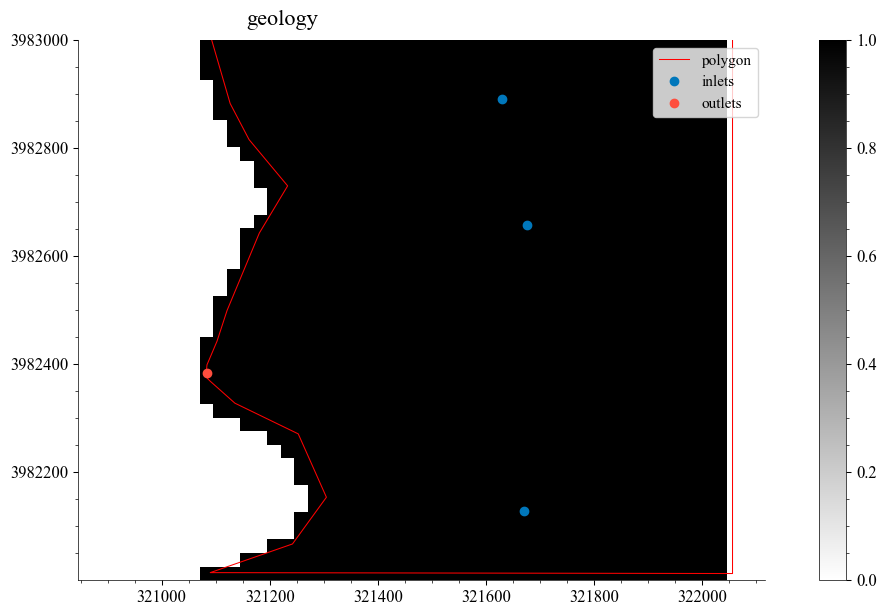

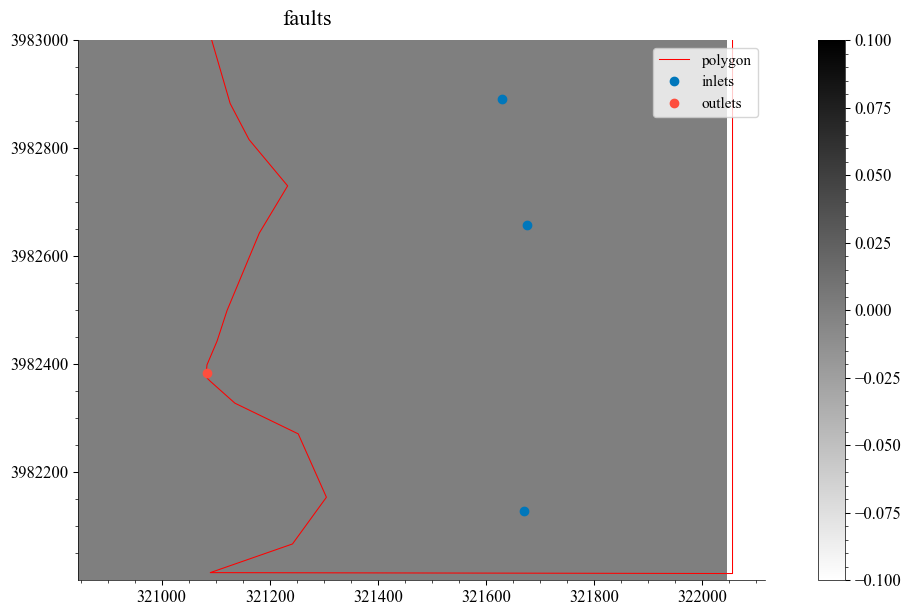

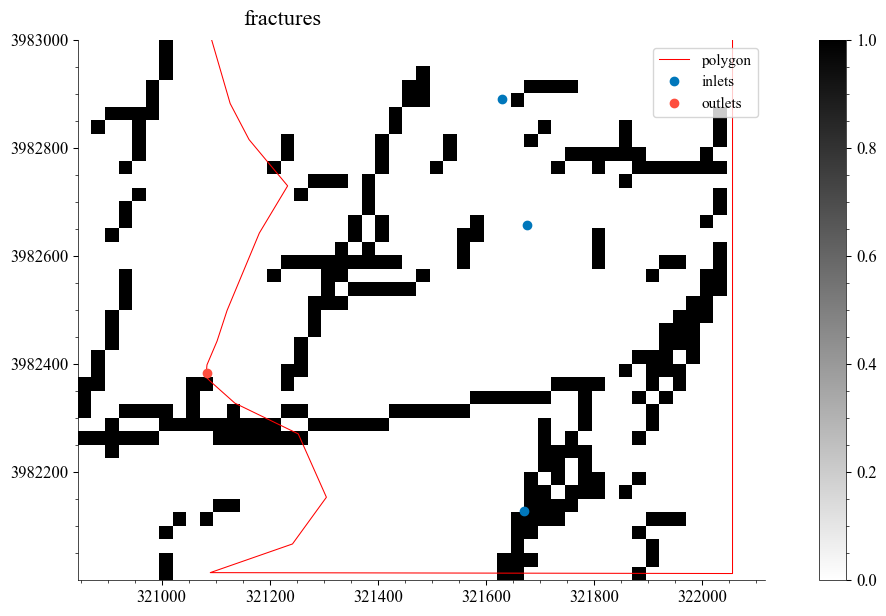

In [41]:
'''Plot the data from yaml file'''
# get data for geology, faults, and fractures as arrays
geology = yaml_file.get_geology()
faults = yaml_file.get_faults()
fractures = yaml_file.get_fractures()
# Show the geology array
yaml_file.show_catchment(data='geology')
# Show the faults array
yaml_file.show_catchment(data='faults')
# Show the fractures array
yaml_file.show_catchment(data='fractures')

- inspect_polygon() - Warning : 4 vertices not inside the grid limits on 19 vertices.
- vertice 1
- vertice 2
- vertice 3
- vertice 19
- initialize_costMap() - Warning : no geology n 2 found.
- initialize_costMap() - Warning : no geology n 3 found.

 This network contains  1  connected components



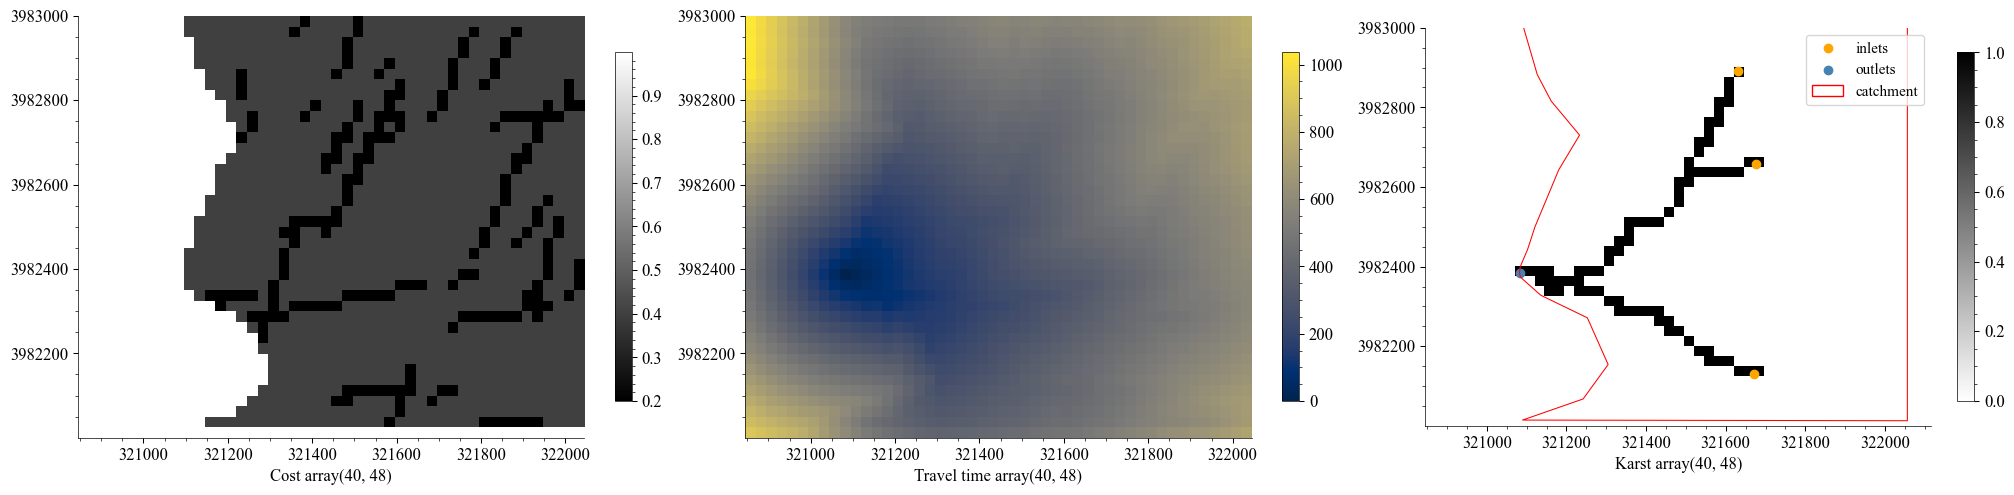

- inspect_polygon() - Warning : 4 vertices not inside the grid limits on 19 vertices.
- vertice 1
- vertice 2
- vertice 3
- vertice 19
- initialize_costMap() - Warning : no geology n 2 found.
- initialize_costMap() - Warning : no geology n 3 found.

 This network contains  1  connected components



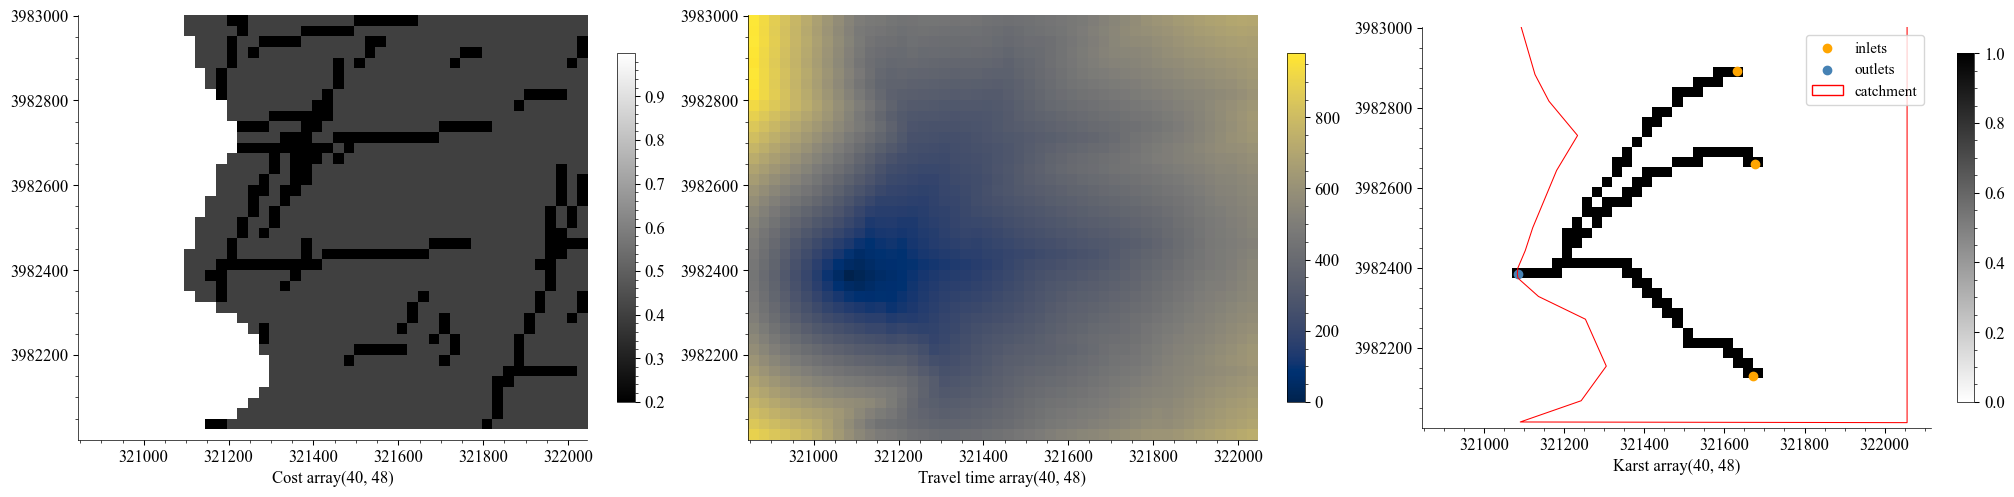

In [42]:
# Create different variations of the model / conduit network
importlib.reload(pk)
variations = 2
for i in range(variations):
    yaml_file.update_all()
    yaml_file.compute_karst_network()
    yaml_file.show()

## Parametrization: initial and boundary conditions

### BAS - Basic Package

In [43]:
'''BAS - BASIC INFORMATION'''
# If ibound < 0: constant head, if = 0: inactive, if > 0: active.
# Create arrays to indicate active cells (ibound) and starting heads (H_init)
# Integer array of dim (z,y,x), makes all cells active 
ibound = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol), dtype=np.int32)
# Initialize starting head array
strt = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol), dtype=np.float32)
# Assign starting head values to all cells
strt[:,:,:] = d_dict['Par_stoch-i']['Initial value']['Matrix starting head']



In [44]:
# Define the basic package
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

adding Package:  BAS6


plotting BAS6 package Util3d instance: ibound
plotting BAS6 package Util3d instance: strt


[<Axes: title={'center': 'ibound layer 1'}>,
 <Axes: title={'center': 'strt layer 1'}>]

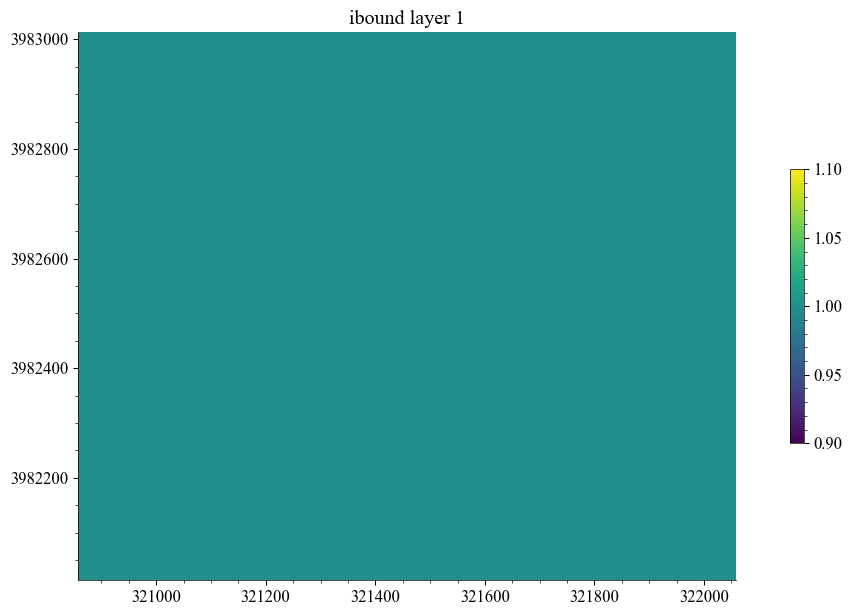

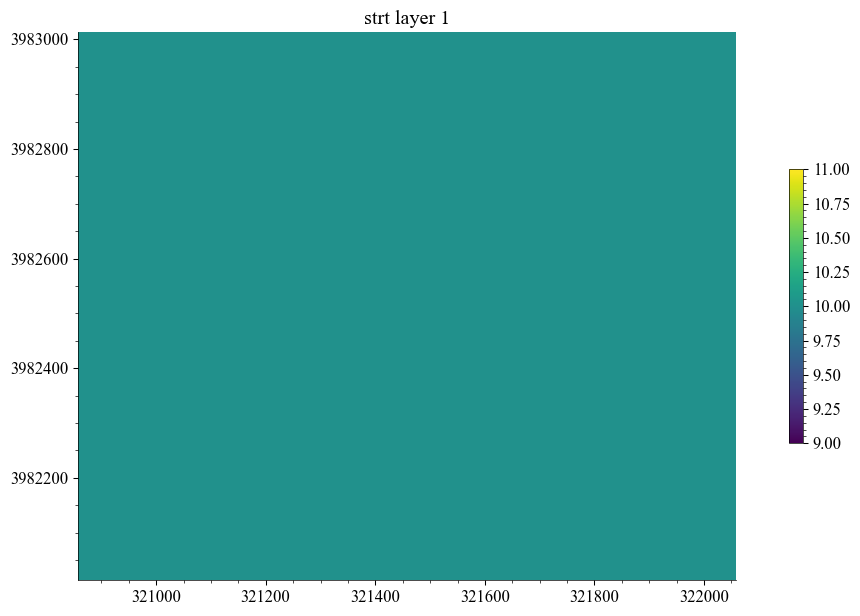

In [45]:
# Plot the basic package settings
bas.plot()

### LPF - Layer Property File

In [46]:
# Horizontal hydraulic conductivity
# Horizontal hydraulic conductivity for the karst system
hk_karst =  d_dict['Par_stoch-i']['Initial value']['Horizontal hydraulic conductivity karst']
# Horizontal hydraulic conductivity for the alluvial system
hk_alluvial = d_dict['Par_stoch-i']['Initial value']['Horizontal hydraulic conductivity alluvial']
# Create an array with ones and multiply it with the horizontal hydraulic conductivity of the karst system
hk = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * hk_karst
# Replace the corresponding cells with the horizontal hydraulic conductivity of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            hk[0,row,col] = hk_alluvial

In [47]:
# Vertical hydraulic conductivity
# Vertical hydraulic conductivity for the karst system
vk_karst =  d_dict['Par_stoch-i']['Initial value']['Vertical hydraulic conductivity karst']
# Vertical hydraulic conductivity for the alluvial system
vk_alluvial = d_dict['Par_stoch-i']['Initial value']['Vertical hydraulic conductivity alluvial']
# Create an array with ones and multiply it with the vertical hydraulic conductivity of the karst system
vk = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * vk_karst
# Replace the corresponding cells with the vertical hydraulic conductivity of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            vk[0,row,col] = vk_alluvial

In [48]:
# Specific storage
# Specific storage for the karst system
ss_karst =  d_dict['Par_stoch-i']['Initial value']['Specific storage karst']
# Specific storage for the alluvial system
ss_alluvial = d_dict['Par_stoch-i']['Initial value']['Specific storage alluvial']
# Create an array with ones and multiply it with the specific storage of the karst system
ss = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * ss_karst
# Replace the corresponding cells with the specific storage of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            ss[0,row,col] = ss_alluvial

In [49]:
# Specific yield
# Specific yield for the karst system
sy_karst =  d_dict['Par_stoch-i']['Initial value']['Specific yield karst']
# Specific yield for the alluvial system
sy_alluvial = d_dict['Par_stoch-i']['Initial value']['Specific yield alluvial']
# Create an array with ones and multiply it with the specific yield of the karst system
sy = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * sy_karst
# Replace the corresponding cells with the specific yield of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            sy[0,row,col] = sy_alluvial

In [50]:
# Unit number to save outputs to 
ipakcb = 50
# Value assigned to dry cells
hdry = 999.
# 0=confined, >0 = unconfined/convertible
laytyp = 1
# Method of calculating interblock tranmissivity, 0=harmonic mean (default)
layavg = 0
# Wetting, 0=inactive, 1=active
laywet = 0

In [51]:
# Define the layer property flow package
lpf = flopy.modflow.ModflowLpf(mf, laytyp=laytyp, laywet=laywet, 
                               ipakcb=ipakcb, hdry=hdry, hk=hk,
                               vka=vk, wetdry=laywet, ss=ss, sy=sy)

Adding mf_stoch.cbc (unit=50) to the output list.
adding Package:  LPF


<Axes: title={'center': 'hk layer 1'}>

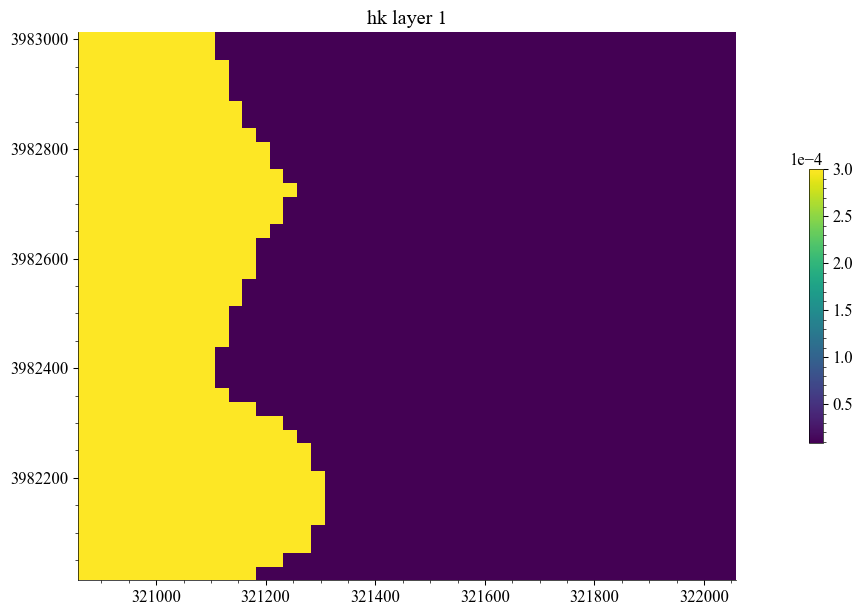

In [52]:
# Plot the defined hydraulic conductivity
mf.lpf.hk.plot(colorbar=True)

plotting LPF package Util3d instance: hk
plotting LPF package Util3d instance: hani
plotting LPF package Util3d instance: vka
plotting LPF package Util3d instance: ss
plotting LPF package Util3d instance: sy
plotting LPF package Util3d instance: vkcb
plotting LPF package Util3d instance: wetdry


[<Axes: title={'center': 'hk layer 1'}>,
 <Axes: title={'center': 'hani layer 1'}>,
 <Axes: title={'center': 'vka layer 1'}>,
 <Axes: title={'center': 'ss layer 1'}>,
 <Axes: title={'center': 'sy layer 1'}>,
 <Axes: title={'center': 'vkcb layer 1'}>,
 <Axes: title={'center': 'wetdry layer 1'}>]

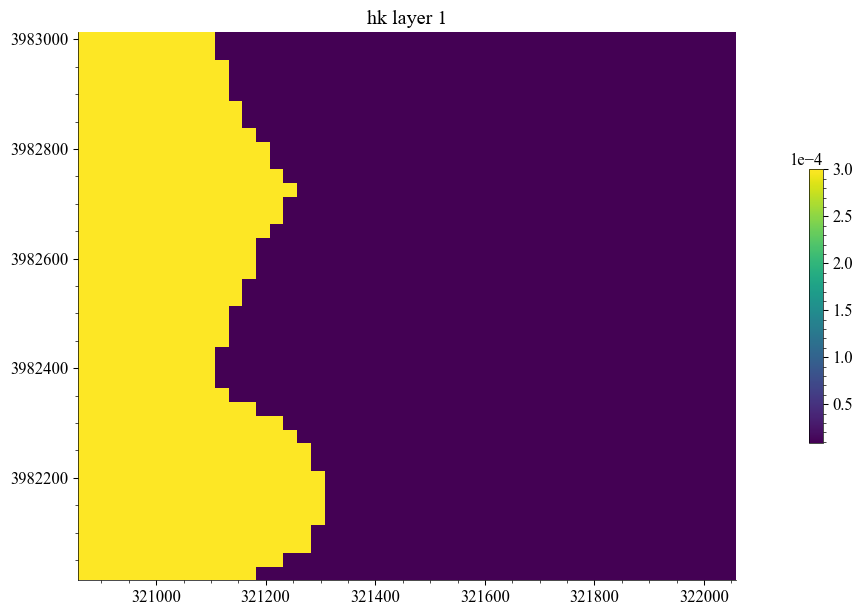

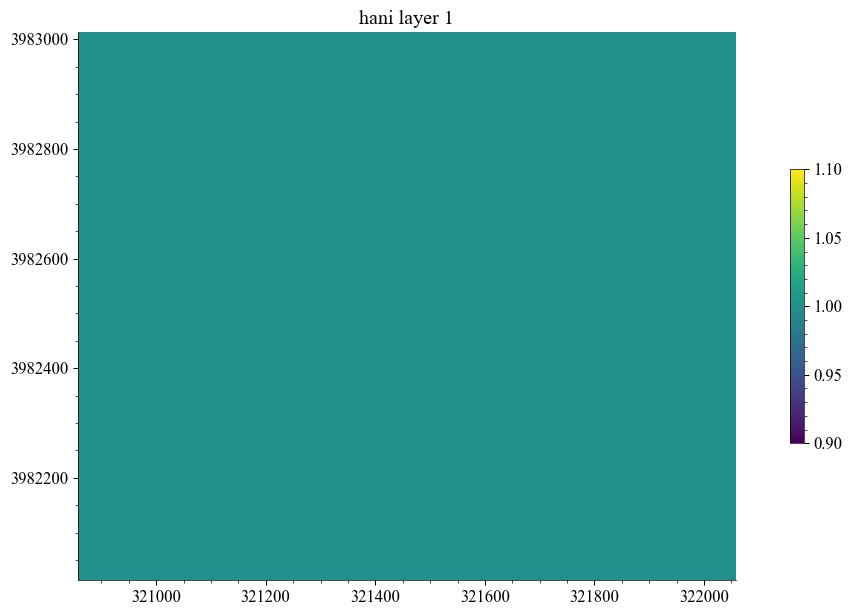

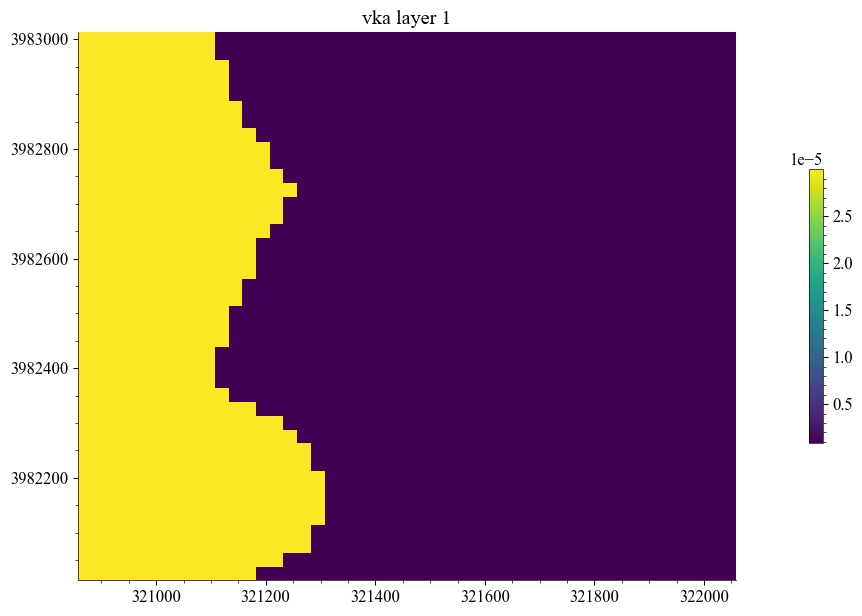

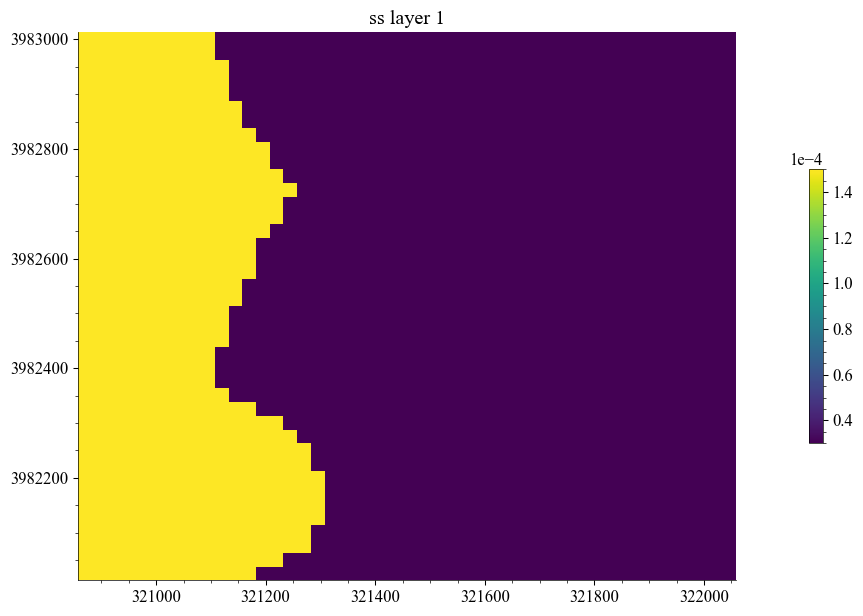

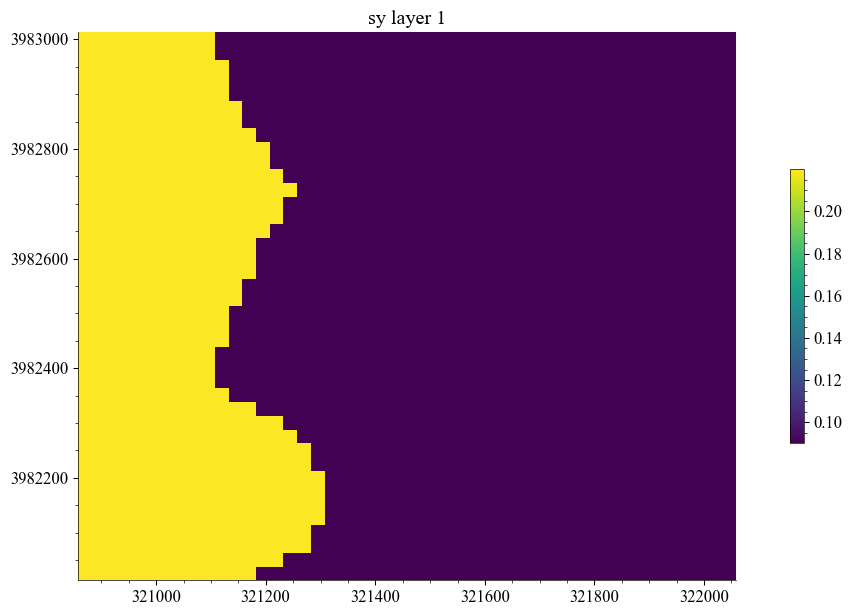

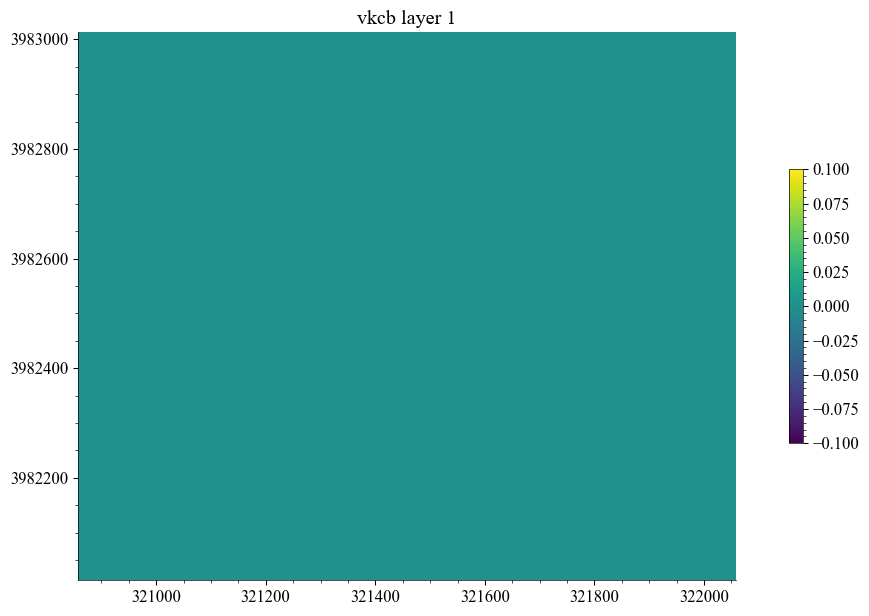

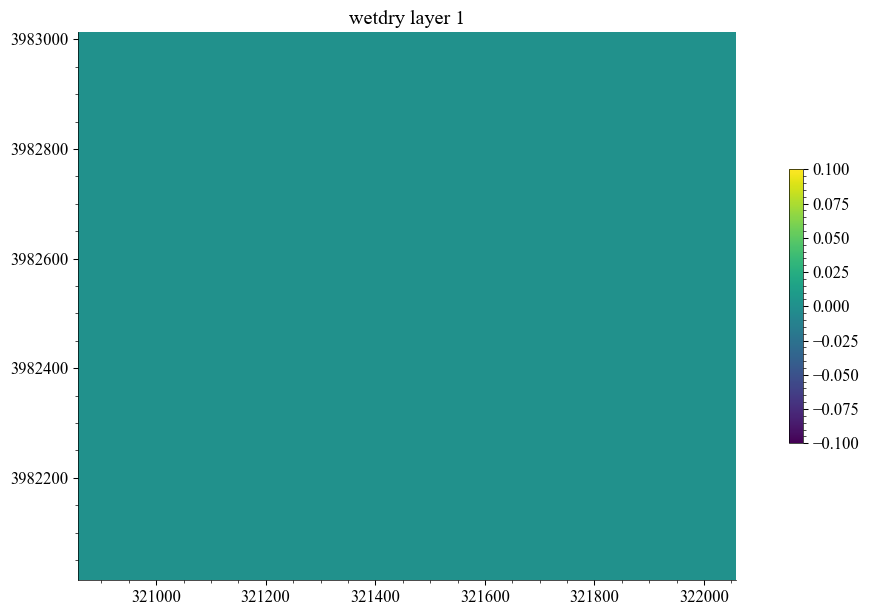

In [53]:
# Plot the layer property flow package settings
mf.lpf.plot()

### BC - Boundary Condition

In [54]:
# Calculate the direct groundwater recharge based on the area of the catchment divided by the size of the model grid cell
d_dict['Catchment_gwr_karst']['gwr_catchment'] = d_dict['Catchment_gwr_karst']['SURFACE']/(celGlo*celGlo)

In [55]:
# Merge the catchment with the corresponding inlets
d_dict['gdf_inlets'] = pd.merge(d_dict['Inlets'], 
                                d_dict['Catchment_gwr_karst'][['Catchment','SURFACE', 'gwr_catchment']], on='Catchment', how='left')

In [56]:
# Show the geopandas dataframe
d_dict['gdf_inlets']

,Name,Elev[m],Catchment,geometry,SURFACE,gwr_catchment
0,inlet1,5.0,Catchment_1,POINT (321675.881 3982657.975),51222,81.9552
1,inlet2,5.0,Catchment_2,POINT (321630.466 3982891.093),48454,77.5264
2,inlet3,5.0,Catchment_3,POINT (321670.076 3982129.074),50095,80.1520


#### RCH - Recharge

In [57]:
# Show the arra with the timestep length
mf.dis.perlen.array

array([3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600.], dtype=float32)

In [58]:
# Define the proportion of the precipitation for the diffuse recharge 
rch_proportion = d_dict['Par_stoch-i']['Initial value']['Diffuse recharge']
# Use xlsx file to define RCH values as timeseries array
rch_ts = np.array(d_dict['RCH']['RCH'])
# Dictionary of recharge fluxes for each stress period
rech = {}
# Loop through each timestep and apply the proportion of the recharge 
for num, rech_in in enumerate(rch_ts):
    # Apply recharge to all cells
    rech_data = np.ones((mf.dis.nrow, mf.dis.ncol)) *rech_in  * rch_proportion 
    # Link the recharge array to the stress period
    rech[num] = rech_data

In [59]:
# Flag, 1=rech only applied to top layer
nrchop = 1
# If non-zero, cell budget data will be saved
ipakcb = 50
# Layer to which recharge is applied to (only used if nrchop=2)
irch = 1

In [60]:
# Define the recharge package
rch = flopy.modflow.mfrch.ModflowRch(mf, nrchop=nrchop, ipakcb=ipakcb, 
                                     rech=rech, irch=irch)


adding Package:  RCH


[<Axes: title={'center': 'RECH stress period 1'}>]

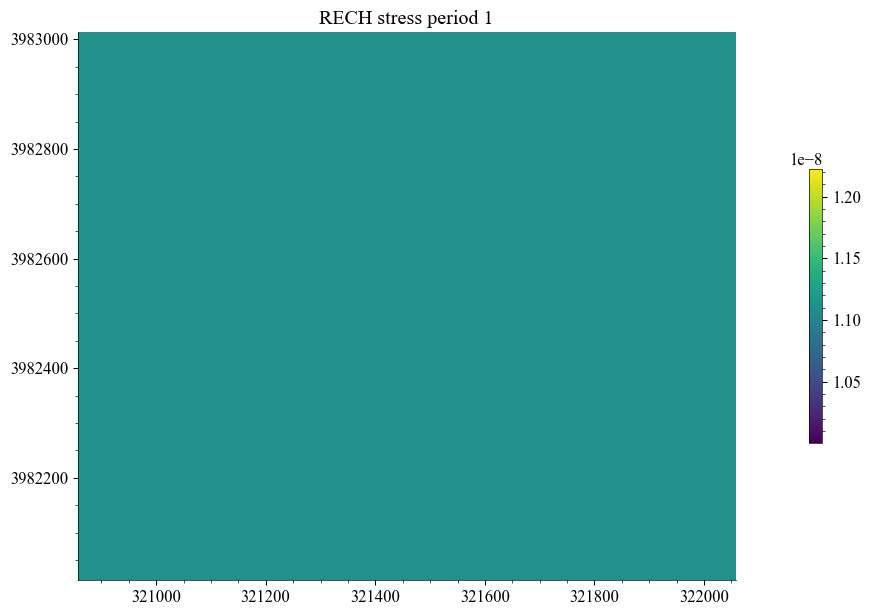

In [61]:
# Plot the recharge package settings for the first stress period
mf.rch.rech.plot(kper=0, colorbar=True)

#### CHD - Constant Head

In [62]:
# Define the constant-head values for each stress period and layer
starting_head = d_dict['Par_stoch-i']['Initial value']['Starting head']
ending_head = d_dict['Par_stoch-i']['Initial value']['Ending head']
# Cretae the stressperiod data for the constant-head package
spd_list = []
for kper in range(mf.dis.nper):
    spd_kper = []
    for k in range(mf.dis.nlay):
        for i in range(d_dict['Isohypse'].shape[0]): # Isohypse 
            for row,col in d_dict[f'Isohypse-{i+1:03d}-ix-cid']: # cellids
                spd_layer = [[k, row, col, starting_head, ending_head]]
                #{0: [[lay, row, col, shead, ehead],...],...}
                spd_kper.extend(spd_layer)
    spd_list.append(spd_kper)
spd = {kper: spd_list[kper] for kper in range(mf.dis.nper)}


In [63]:
# Define the CHD package
chd = flopy.modflow.mfchd.ModflowChd(mf, stress_period_data=spd)

adding Package:  CHD


<Axes: title={'center': 'CHD location stress period: 1 layer: 1'}>

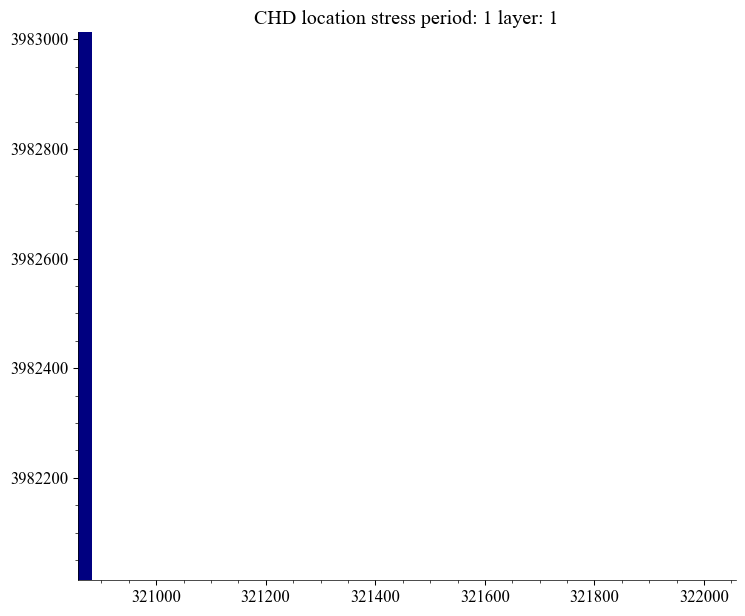

In [64]:
# Plot the constant-head package settings for the first stress period
mf.chd.stress_period_data.plot(kper=0, colorbar=True) 

### HOB - HEAD OBSERVATIONS

In [65]:
# Use the observed heads from the synthetic reference system
hob_out_syn = pd.read_csv(os.path.join(p_folders['02_model_mf_syn'],
                          'mf_syn.hob_out'), sep = '\t')
hob_out_syn

,SIMULATED EQUIVALENT,OBSERVED VALUE,OBSERVATION NAME
0,11.555435,0.0,obs1_1
1,11.555281,0.0,obs1_2
2,11.555127,0.0,obs1_3
3,11.554973,0.0,obs1_4
4,11.554819,0.0,obs1_5
...,...,...,...
235,21.883062,0.0,obs5_44
236,21.884515,0.0,obs5_45
237,21.885605,0.0,obs5_46
238,21.885422,0.0,obs5_47


In [66]:
# Zero values for all time steps - no observed heads
# Create a dictionary with the observation points as keys with the time series and the observed values 
data_obs = {}
time = mf.dis.get_totim()
for name in d_dict['Observations']['Name']:
    data_obs[name] = [[t, simval] for t, simval in zip(time,
                                                       hob_out_syn['SIMULATED EQUIVALENT'])]
# Show the dictionary
data_obs

{'obs1': [[3600.0, 11.555434926],
  [7200.0, 11.555281054],
  [10800.0, 11.55512719],
  [14400.0, 11.554973336],
  [18000.0, 11.554819493],
  [21600.0, 11.554665665],
  [25200.0, 11.554511852],
  [28800.0, 11.554358057],
  [32400.0, 11.554204285],
  [36000.0, 11.554050537],
  [39600.0, 11.553896816],
  [43200.0, 11.553896967],
  [46800.0, 11.553897144],
  [50400.0, 11.553743512],
  [54000.0, 11.553743758],
  [57600.0, 11.554128638],
  [61200.0, 11.555667332],
  [64800.0, 11.556898306],
  [68400.0, 11.558052322],
  [72000.0, 11.558821689],
  [75600.0, 11.55928333],
  [79200.0, 11.56066796],
  [82800.0, 11.562052485],
  [86400.0, 11.563513801],
  [90000.0, 11.565821079],
  [93600.0, 11.570051126],
  [97200.0, 11.5730501],
  [100800.0, 11.574356485],
  [104400.0, 11.575124104],
  [108000.0, 11.57581446],
  [111600.0, 11.576196758],
  [115200.0, 11.576347897],
  [118800.0, 11.576344777],
  [122400.0, 11.576495058],
  [126000.0, 11.576414112],
  [129600.0, 11.576948045],
  [133200.0, 11.577

In [67]:
# Define the layers of the observation points (layer 0 = top layer)
lay_obs = [0] * len(d_dict['Observations'])
lay_obs

[0, 0, 0, 0, 0]

In [68]:
# Define the x and y coordinates of the cell centers of the observation points
xcenter = mf.modelgrid.xcellcenters
ycenter = mf.modelgrid.ycellcenters
print(xcenter)
print(ycenter)

[[320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 ...
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]]
[[3983000.31168534 3983000.31168534 3983000.31168534 ... 3983000.31168534
  3983000.31168534 3983000.31168534]
 [3982975.31168534 3982975.31168534 3982975.31168534 ... 3982975.31168534
  3982975.31168534 3982975.31168534]
 [3982950.31168534 3982950.31168534 3982950.31168534 ... 3982950.31168534
  3982950.31168534 3982950.31168534]
 ...
 [3982075.31168534 3982075.31168534 3982075.31168534 ... 3982075.31168534
  3982075.31168534 39820

In [69]:
# Calculate offset of observations from the x and y cellcenter
# save the information in a dictionary
data_offset = {}
for i in d_dict['Observations'].index: 
    print(i)
    print(d_dict['Observations']['Name'][i], ':')
    # Get the name of the observation point
    name = d_dict['Observations']['Name'][i]
    # Get the x and y coordinates of the observation point
    x,y = d_dict[f'Observations-{i+1:03d}-ix']['ixshapes'][0].xy
    x = x[0]
    y = y[0]
    # Get the row and column of the observation point
    row, col = d_dict[f'Observations-{i+1:03d}-ix-cid'][0]
    # Print the information
    print('xcord:', x)
    print('ycord:', y)
    print('xcellcenter:', xcenter[row][col])
    print('ycellcenter:', ycenter[row][col])
    # Get the offset of the observation point from the cell center
    x_off = (x - xcenter[row][col])/(celGlo)
    y_off = (y - ycenter[row][col])/(celGlo)
    print('x proportion cell:', x_off)
    print('y proportion cell:', y_off)
    # Save the information in the dictionary
    data_offset[f'name_{i+1}'] = name.replace(' ','_')
    data_offset[f'x_{i+1}'] = x
    data_offset[f'y_{i+1}'] = y
    data_offset[f'x_off_{i+1}'] = x_off
    data_offset[f'y_off_{i+1}'] = y_off
    data_offset[f'row_{i+1}'] = row
    data_offset[f'col_{i+1}'] = col

0
obs1 :
xcord: 320957.9263425829
ycord: 3982232.214948685
xcellcenter: 320969.838297
ycellcenter: 3982225.311685344
x proportion cell: -0.4764781766827218
y proportion cell: 0.2761305336281657
1
obs2 :
xcord: 321063.7062214858
ycord: 3982515.2715854477
xcellcenter: 321069.838297
ycellcenter: 3982525.311685344
x proportion cell: -0.24528302056714893
y proportion cell: -0.401603995859623
2
obs3 :
xcord: 321291.9708371067
ycord: 3982605.633509103
xcellcenter: 321294.838297
ycellcenter: 3982600.311685344
x proportion cell: -0.11469839573139325
y proportion cell: 0.21287295036017895
3
obs4 :
xcord: 321385.53107485216
ycord: 3982449.929299007
xcellcenter: 321394.838297
ycellcenter: 3982450.311685344
x proportion cell: -0.37228888591285797
y proportion cell: -0.01529545348137617
4
obs5 :
xcord: 321640.8397698257
ycord: 3982461.270220582
xcellcenter: 321644.838297
ycellcenter: 3982450.311685344
x proportion cell: -0.15994108697166667
y proportion cell: 0.4383414095081389


In [70]:
# Create a dictionary with the head observations
hob_obs = {}
# Create for each observation point a head observation object and save it in the dictionary
for i in d_dict['Observations'].index: 
    hob_obs[f'obs_{i+1}'] = flopy.modflow.mfhob.HeadObservation(
        mf, 
        layer =lay_obs[i], # Starts by lay 0
        row = data_offset[f'row_{i+1}'], 
        column = data_offset[f'col_{i+1}'],
        coff = data_offset[f'x_off_{i+1}'],
        roff = data_offset[f'y_off_{i+1}'],
        obsname = data_offset[f'name_{i+1}'], 
        names = [f'{data_offset[f"name_{i+1}"]}_{j+1}' for j in range(mf.dis.nper)],
        time_series_data = data_obs[f'obs{i+1}'])

#### Write HOBS file

In [71]:
# Put the head observation objects in a list
obs_data = []
for obs in hob_obs.values():
    obs_data.append(obs)
obs_data

In [72]:
# Define the head observation package
hob = flopy.modflow.ModflowHob(mf, hobdry=-9999., obs_data=obs_data)

adding Package:  HOB


### PCG - Preconditioned Conjugate-Gradient Package (Solver)

In [73]:
'''PCG - SOLVER'''
""" solver tolerances """
# Max number of outer iterations 
mxiter = 2000
# Number of inner iterations
iter1 = 2000
# Modflow general tolerance
mftol = 2e-4
# Modflow relaxation parameter
mfrelax = 0.99
# Flag for matrix conditioning method, 1=modified incomplete cholesky
npcond = 1
# Flag for active cell surrounded by dry cells. 0=converts to dry, not0=converts only if hcof=0
ihcofadd = 9999
#  Relaxation parameter with npcond=1 
relax = mfrelax
# Estimate of upper bound
nbpol = 2
# Printout interval
iprpcg = 5
# Print flag
mutpcg = 0
#damping factor
damppcg = 0.99


In [74]:
# Define the preconditioned conjugate gradient package settings
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, iter1=iter1, npcond=npcond,
                               hclose=mftol, rclose=mftol, 
                               relax=relax, nbpol=nbpol, iprpcg=iprpcg, mutpcg=mutpcg, damp=damppcg,
                               ihcofadd=ihcofadd)

adding Package:  PCG


### OC - Output Control

In [75]:
# Create output control file using dictionary
per_dict = {(kper,0): ['print head', 'save head', 'save budget'] for kper in range(mf.dis.nper)}

In [76]:
# Define the output control settings
oc = flopy.modflow.ModflowOc(mf, stress_period_data=per_dict)

Adding mf_stoch.hds (unit=51) to the output list.
adding Package:  OC


## CFP Conduit model

Basic information for the conduit model (CFP)

###  Conduit Flow Process related information

In [77]:
'''Initial Parameters for conduit model'''
# CFP numerical solution - general tolerance
cfptol = 1e-9
# Number of iterations
niter = 2000 
# CFP numerical solution - relaxation parameter
cfprelax = 0.99
# CFP position of spring
x_spring = [yaml_data['outlets_data'][0][0]] 
y_spring = [yaml_data['outlets_data'][0][1]] 
'''Boundary conditions'''
# defined head at spring node [L]
# if head > 0: fixed head
# if head == -1: calculated head
chb_spring = -1 

""" Hydraulic characteristics """
# pipe diameter [L]
diameter = d_dict['Par_stoch-i']['Initial value']['Pipe diameter']
# pipe tortuosity [-]
tortuosity = d_dict['Par_stoch-i']['Initial value']['Pipe tortuosity']
# roughness height [L]
rheight = d_dict['Par_stoch-i']['Initial value']['Roughness height']
# lower critical reynolds number
lcritrey = d_dict['Par_stoch-i']['Initial value']['Lower critical reynolds number']
# higher critical reynolds number
hcritrey = d_dict['Par_stoch-i']['Initial value']['Higher critical reynolds number']

""" KEX Data """
# conduit wall conductivity [L²/T]
k_exchange_karst = d_dict['Par_stoch-i']['Initial value']['Conduit wall conductivity karst']
k_exchange_alluvial = d_dict['Par_stoch-i']['Initial value']['Conduit wall conductivity alluvial']

""" CADS Data """
# conduit associated storage (CADS), assign width of the storage [L]
cad = d_dict['Par_stoch-i']['Initial value']['Conduit associated storage (width)']

In [78]:
# nbr-data contains:
#     0: node numbers
#     1: plane numbers
#     2: node locations
#     3: conduit locations
#     4: node neighbors
#     5: tube numbers
#     6: tube pairs
#     7: tube neighbors

# nbr data: locations in grid are indexed differently:
#     MODFLOW: (LAY, ROW, COL)
#     CFPy: (COL, ROW, LAY)

In [79]:
# Variations of network constellations

# Define the number of model variants (Different network geometry)
n_variants = 3

In [80]:
# Define the path to the folder with the model variants
path = p_folders['02_model_mf_stoch']

In [81]:
# Put the start points (outlets) of the conduits in a list
start_points = []
for nr in range(d_dict['Outlets'].shape[0]):
    for cell in d_dict[f'Outlets-{nr+1:03d}-ix-cid']:
        start_points.append((cell[0], cell[1]))
# Show the start points
start_points

[(25, 9)]

In [82]:
# Put the end points (inlets) of the conduits in a list
end_points = []
for nr in range(d_dict['Inlets'].shape[0]):
    for cell in d_dict[f'Inlets-{nr+1:03d}-ix-cid']:
        end_points.append((cell[0], cell[1]))
# Show the end points
end_points

[(14, 32), (4, 30), (35, 32)]

CAUTION: You are using the development version of this package.
- inspect_polygon() - Warning : 4 vertices not inside the grid limits on 19 vertices.
- vertice 1
- vertice 2
- vertice 3
- vertice 19
- inspect_polygon() - Warning : 4 vertices not inside the grid limits on 19 vertices.
- vertice 1
- vertice 2
- vertice 3
- vertice 19
- initialize_costMap() - Warning : no geology n 2 found.
- initialize_costMap() - Warning : no geology n 3 found.

 This network contains  1  connected components


Always visually check the validated network for structuralcorrectness! 
i.e., whether branches are correctly isolated or ifthey got connected during processing.
Network is correctly linked
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Writing packages:
   Package:  DIS
   Package:  BAS6
   Package:  LPF
   Package:  RCH
   Package:  CHD


   Package:  HOB
   Package:  PCG
   Package:  OC
 

mf_stoch MODEL DATA VALIDATION SUMMARY:
  2 Warnings:
    RCH package: Mean R/T ratio < checker warning threshold of 2e-08 for 17 stress periods
    RCH package: Variable NRCHOP set to value other than 3

  Checks that passed:
    Unit number conflicts
    Compatible solver package
    DIS package: zero or negative thickness
    DIS package: thin cells (less than checker threshold of 1.0)
    DIS package: nan values in top array
    DIS package: nan values in bottom array
    BAS6 package: isolated cells in ibound array
    BAS6 package: Not a number
    LPF package: zero or negative horizontal hydraulic conductivity values
    LPF package: zero or negative vertical hydraulic conductivity values
    LPF package: negative horizontal anisotropy values
    LPF package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    LPF package: horizontal hydraulic conductivity values above checker threshold of 100000.0
  

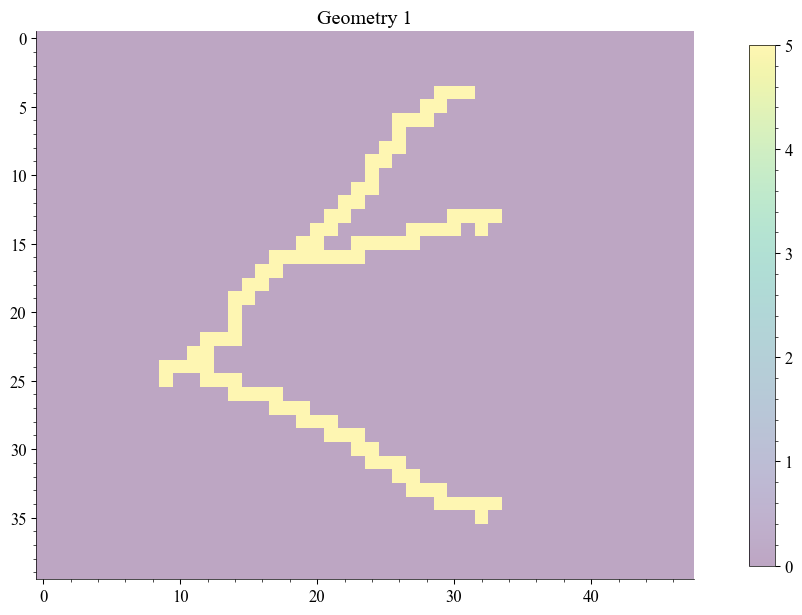

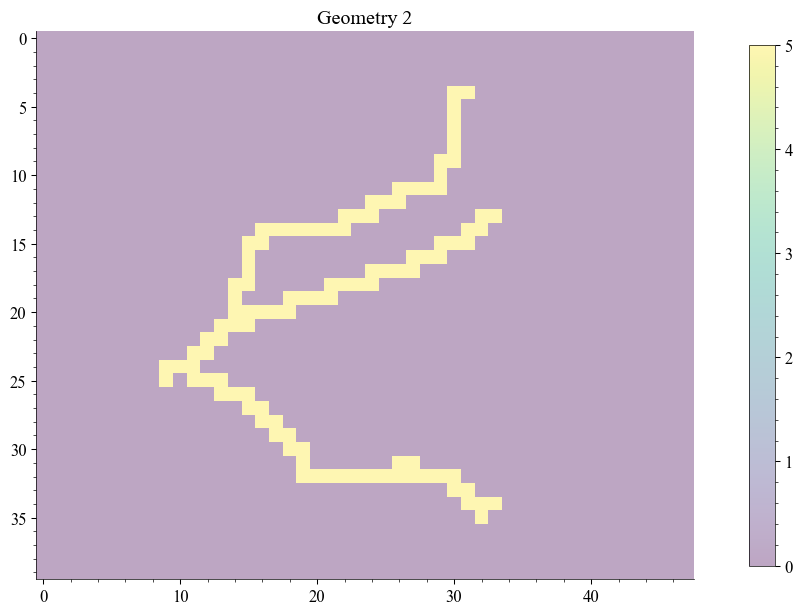

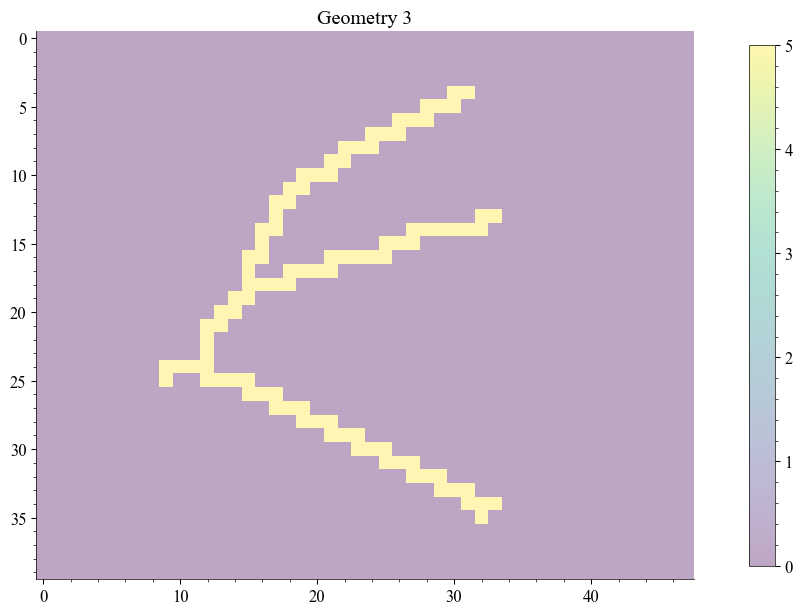

In [83]:
# First, remove previous results (if any)
clean_results(path = path)
# Initialize success counter
n_success = 0
# Initialize list for unsuccessful runs
not_success = []
# Initialize a counter, counter for networks and error counter
count = 0
count_networks = 0
error_count = 0
# Initialize empty array for collected networks
networks_collected = np.array([])
# Initialize empty dictionary for valid networks
all_valid_networks = {}
# Define the elevation of the conduit nodes
elev_nodes = 5

# Loop until the number of successful runs is equal to the number of model variants
while n_success < n_variants:
    # If too many errors, stop the loop (i.e. if the model cannot be generated due to gaps in the network, duplicate networks, etc.)
    if error_count >= 10:
        print("Too many errors, stopping loop")
        break
    try:
        # Load the yaml file
        os.chdir(main_dir)
        importlib.reload(pk)

        # Generate the network
        validator, valid_network = create_network(yaml_settings_file='settings_modified.yaml', model = mf,
                                                  elev_nodes = elev_nodes)
        # Check for duplicate networks
        networks_collected = check_for_network_duplicates(mf, valid_network, networks_collected, count_networks, start_points, end_points)
        count_networks += 1

        # Show the valid network
        print(valid_network)

        # Write MODFLOW input files
        mf.write_input()
        mf.check()
        
        # Generate the conduit network
        # Define the network elevation
        network_elevs = valid_network * elev_nodes
        # Create nbr data
        validator.generate_nbr(path = p_folders['02_model_mf_stoch'],
                               nplanes = 1)
        # Change directory to the folder with the model variants
        os.chdir(p_folders['02_model_mf_stoch'])
        # Read the nbr data
        nbr = cfpy.nbr()
        bot_elev, cond_elev = nbr.nbr_read()
        nbr_data = nbr.nbr(bot_elev, cond_elev)

        # get pipe numbers
        p_num = nbr_data[5]

        # Summarize hydraulic and physical data in a 2D-array
        pipe_data = [nbr_data[5],
                     list(np.ones(len(p_num)) * diameter),
                     list(np.ones(len(p_num)) * tortuosity),
                     list(np.ones(len(p_num)) * rheight),
                     list(np.ones(len(p_num)) * lcritrey),
                     list(np.ones(len(p_num)) * hcritrey)]
        
        # Define the node head data as a list
        # If head > 0: fixed head
        # If head == -1: calculated head
        n_head = np.ones((len(nbr_data[0]))) * -1
        n_head = n_head.tolist()
        node_data = [nbr_data[0], n_head]

        
        '''KEX Data'''
        # Define Conduit wall conductivity [L²/T] (k_exchange) for each conduit in the karst system
        kex_data = [nbr_data[0], np.ones(len(nbr_data[0])) * k_exchange_karst]
        outlets_list_idx = []
        # Higher k_exchange for conduits connected to the alluvial system
        for row_index, element in enumerate(nbr_data[2]):
            for i in range(d_dict['Outlets'].shape[0]):
                for cell in d_dict[f'Outlets-{i+1:03d}-ix-cid']:
                    row,col = cell
                    if element == [col+1,row+1,1]:
                    # Store the position of the target value 
                        outlets_list_idx.append(row_index)
                        # Replace the corresponding cell with the k_exchange of the alluvial system
                        kex_data[1][row_index] = k_exchange_alluvial
        # Print the index of the outlets
        print(outlets_list_idx)

        '''CRCH & CADS'''
        p_crch = (np.zeros(len(nbr_data[0]))).tolist()
        cads_data = (np.zeros(len(nbr_data[0]))).tolist()

        # Initialise CRCH Module (Conduit Recharge)
        inlets_list_idx = []
        for row_index, element in enumerate(nbr_data[2]):
            for i in range(d_dict['Inlets'].shape[0]):
                for cell in d_dict[f'Inlets-{i+1:03d}-ix-cid']:
                    row, col = cell
                    if element == [col+1,row+1,1]:
                    # Store the position of the target value 
                        inlets_list_idx.append(row_index)
                        # Replace the corresponding cell with the direct recharge of the catchment
                        p_crch[row_index] = d_dict['gdf_inlets']['gwr_catchment'][i] 
                        # Define the CADS for the inlets
                        cads_data[row_index] = cad
        # Show the index of the inlets
        print(inlets_list_idx)

        # Define CRCH Module (Conduit Recharge)
        crch = cfpy.crch(iflag_crch = 1, 
                    nper = mf.dis.nper, 
                    node_numbers = nbr_data[0], 
                    p_crch = p_crch)       

        ''' Write input'''
        # Create list of strings
        crch = crch.crch()

        """ Instantiate CFP """
        cfp = cfpy.cfp(mode = 1,
                        nnodes = len(nbr_data[0]), 
                        npipes = len(nbr_data[5]), 
                        nlay = mf.dis.nlay,
                        nbr_data = nbr_data, 
                        geoheight = cond_elev, 
                        sa_exchange = 0, 
                        epsilon = cfptol,
                        niter = 2000, 
                        relax = cfprelax, 
                        p_nr = 0, 
                        cond_data = pipe_data, 
                        n_head = node_data, 
                        k_exchange = kex_data, 
                        ncl = 0, 
                        cl = 0, 
                        ltemp = 10,
                        condl_data = 0,
                        cads = cads_data)
        
        """ Instantiate COC """
        coc = cfpy.coc(nnodes = len(nbr_data[0]),
                    node_numbers = nbr_data[0],
                    n_nts = 1,
                    npipes = len(nbr_data[5]), 
                    pipe_numbers = nbr_data[5],
                    t_nts = 1)
        coc = coc.coc()

        # Create list of strings
        cfp = cfp.cfp()

        """ Write Input """
        input_files = cfpy.write_input(modelname = modelname,
                                        data_strings = [coc, crch, cfp],
                                        file_extensions = ['coc', 'crch', 'cfp'])

        # Write CFP input files
        input_files.write_input()

        """ Update nam file """
        nam = cfpy.update_nam(modelname = modelname,
                                mode = 1,
                                cfp_unit_num = 52,
                                crch_unit_num = 53,
                                coc_unit_num = 54)

        # Update existing .nam file
        nam.update_nam()

        # RUN THE MODEL
        success, buff = mf.run_model(silent=False)

        count +=1

        if success:      
            n_success += 1
            # Store the valid networks
            all_valid_networks[f'netw{n_success}'] = np.where(valid_network>=1, 1, valid_network)
            # Plot the model network (conduit network)
            fig = plt.figure()
            im = plt.imshow(valid_network, alpha = 0.35)
            plt.colorbar(im, shrink=0.95)
            plt.title(f'Geometry {n_success}')
            plt.savefig(os.path.join(path, f'network_{n_success:03d}.jpg'),
                        dpi=300)
            # Save the model results (conduit network) 
            store_results(n_success, path, modelname)

        else:
            # If the model run was not successful, store the network as unsuccessful
            not_success.append(i)

    except:
        print("An error occurred (Network already exist). Retrying to generate new network...")
        error_count += 1
        continue       
        
print(f"Number of errors: {error_count}")
print('Computational loop finished for ', n_variants, ' variants. ', n_success, 'variants solved successfully.')
print('Variants with unsuccessful runs: {}'.format(not_success))
# Set the main directory as the working directory
os.chdir(main_dir)

# Postprocessing

### Head map and cross section

In [84]:
# List all foldernames in the stochastic model directory
folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
folders

['run_001', 'run_002', 'run_003']

In [85]:
for i,folder in enumerate(folders):
       # Extract head and flow budget
        # Define the names
        hds_name = modelname + ".hds"
        cbc_name = modelname + ".cbc"
        # Extract the head and cell budget objects'
        d_dict[f'hdobj{i}'] = flopy.utils.HeadFile(os.path.join(os.path.join(
                p_folders['02_model_mf_stoch'], folder, hds_name)))
        d_dict[f'cbb{i}']=flopy.utils.CellBudgetFile(os.path.join(os.path.join(
                p_folders['02_model_mf_stoch'], folder, cbc_name)))

In [86]:
# Define the settings for the plot
settings = {'cmap': 'viridis',
            'cmap_show': True,
            'vmin': 0,
            'vmax': 50,
            'cmap_alpha': 0.5,
            'cbar_show': True,
            'cbar_label': 'Head [m]',
            'masked_values': [-1.e+20, -2.e+20],
            'cbar_shrink': 0.8,
            'contour_colors' : 'whitesmoke',
            'cbar_rotation': 90,
            'cbar_labelpad': 10,
            'contourlabel_format': '%.1fm',
            'normalize' : True,
            'vector_alpha': 1,
            'vector_color': 'navy',
            'vector_scale': 55,
            'istep' : 2,
            'jstep' : 2,
            'hstep' : 2,}
# Define the levels for the contour plot
levels = np.linspace(settings['vmin'], settings['vmax'], 
                     (settings['vmax'] - settings['vmin']) + 1)



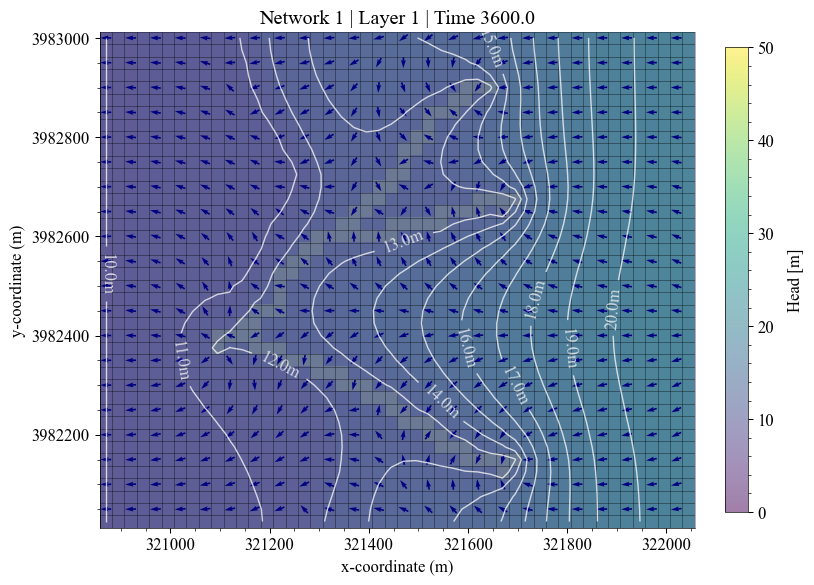

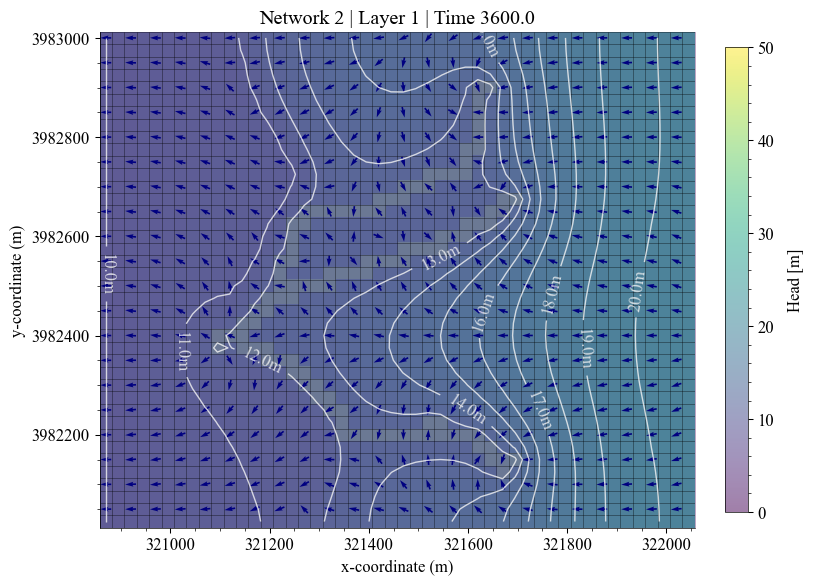

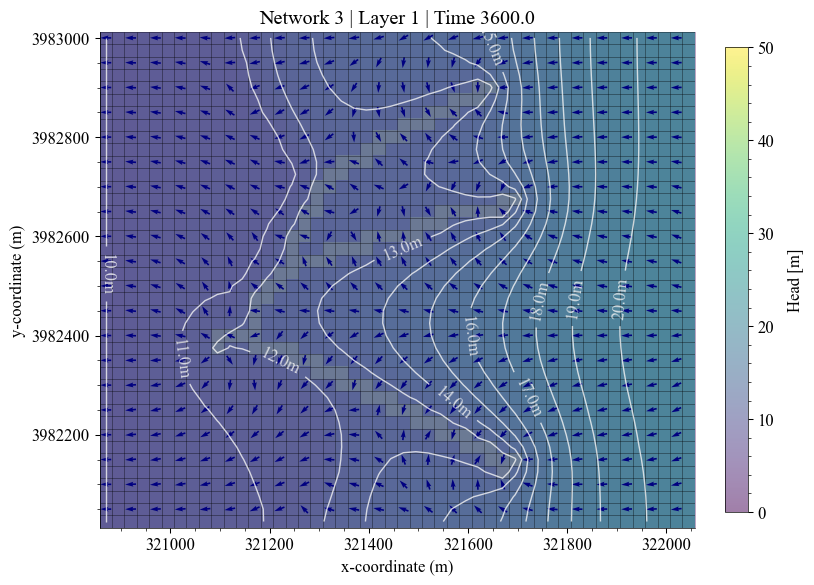

In [87]:
for i,folder in enumerate(folders):
    # Model results (conduit network)
    mf_plot = plot_model(model = mf, layer = 0, time = mf.dis.get_totim()[0],
                        hdobj = d_dict[f'hdobj{i}'], 
                        cbb = d_dict[f'cbb{i}'], settings = settings)
    # Plot the model results (conduit network)
    # Create a figure with one subplot
    fig, ax = plt.subplots(figsize=(8,6), nrows=1, ncols=1)
    # Plot the head map, contour map and vector map
    mf_plot.head_map(ax=ax)
    mf_plot.contour_map(ax=ax, levels = levels)
    mf_plot.vector_map(ax=ax, vec = 'specific')
    # plot_system(ax = ax)  # Here you can add the synthetic reference system
    # Plot the model network (conduit network)
    ax.imshow(all_valid_networks[f'netw{i+1}'], alpha = 0.35,
               extent = [GloRefBox['minx'][0], GloRefBox['maxx'][0],
                         GloRefBox['miny'][0], GloRefBox['maxy'][0]])
    # Define the title
    plt.title(f'Network {i+1} | Layer 1 | Time {mf.dis.get_totim()[0]}')


### Network probability distribution

In [88]:
# How many networks are valid?
n_success

3

In [89]:
# Create a probability map based on the different networks
prop_network = np.zeros((mf.dis.nrow, mf.dis.ncol))
for key, network in all_valid_networks.items():
    prop_network += network / n_success

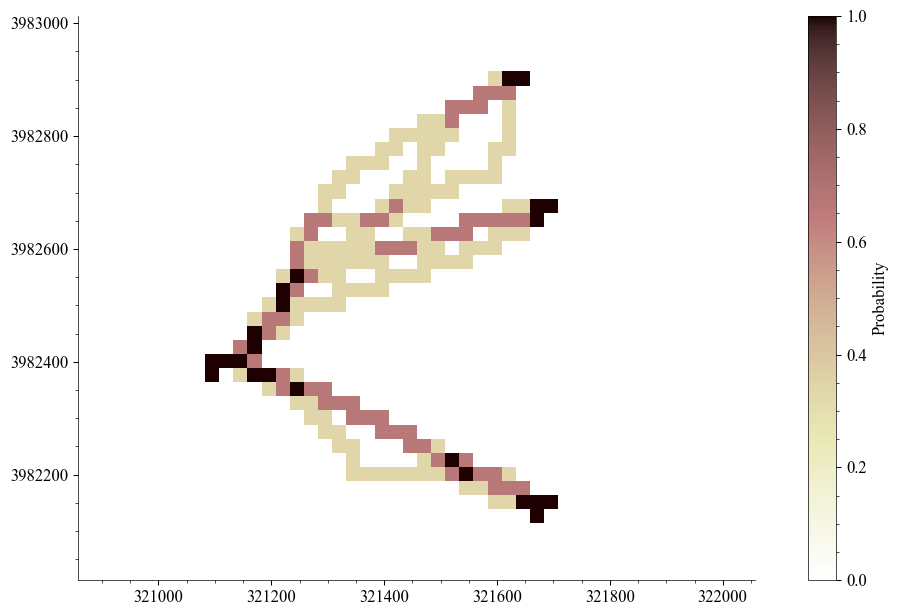

In [90]:
# Plot the probability map
fig, ax = plt.subplots(figsize=(12,6), nrows=1)
# plot_system(ax = ax) # Here you can add the synthetic reference system
im = ax.imshow(prop_network, cmap = 'pink_r', alpha = 1, 
               extent = [GloRefBox['minx'][0], GloRefBox['maxx'][0],
                         GloRefBox['miny'][0], GloRefBox['maxy'][0]])
cb = plt.colorbar(im, shrink=1.0, label = 'Probability')

### Standard deviation heads

In [91]:
# Create a standard deviation map based on the steady state heads
steady_heads = []
for i,folder in enumerate(folders):
    # Select the steady state heads
    d_dict[f'hdobj{i}_hds'] = d_dict[f'hdobj{i}'].get_data(totim=mf.dis.get_totim()[0])
    # Replace the no data values with nan
    d_dict[f'hdobj{i}_hds'][d_dict[f'hdobj{i}_hds'] == -999.99] = np.nan
    # Append the steady state heads to the list
    steady_heads.append(d_dict[f'hdobj{i}_hds'])
# Turn the list into an array
steady_heads = np.array(steady_heads)

In [92]:
# Calculate the standard deviation of the steady state heads
steady_std = np.std(steady_heads[:,:,:], axis = 0) # layer 0 (Top layer)

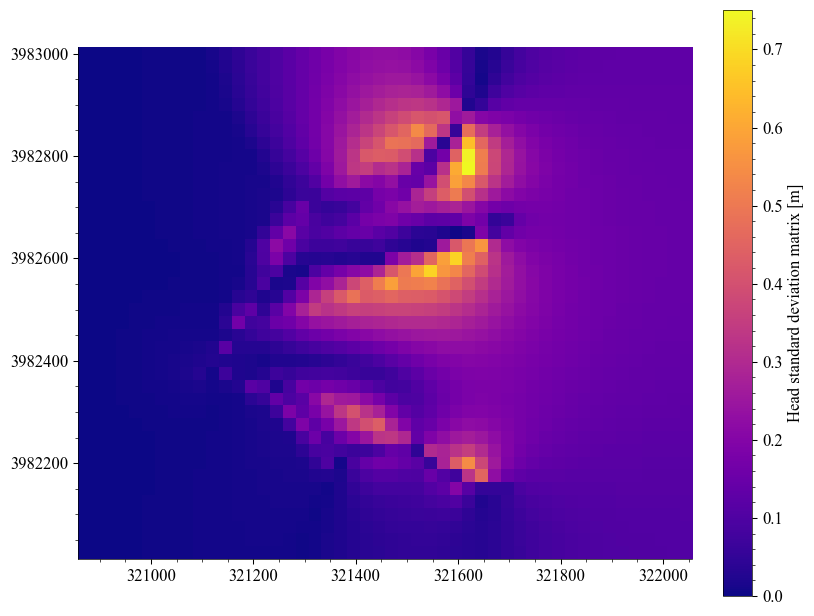

In [93]:
# Plot the standard deviation map
fig, ax = plt.subplots(figsize=(8,6), nrows=1)
im = plt.imshow(steady_std[0], cmap = 'plasma', alpha = 1,
                extent = [GloRefBox['minx'][0], GloRefBox['maxx'][0],
                          GloRefBox['miny'][0], GloRefBox['maxy'][0]],)
cb = plt.colorbar(im, shrink=1.0,
                  label = 'Head standard deviation matrix [m]')

### Global Water Budget

### Matrix

In [94]:
# Set the time unit 
timeunit = 'seconds'
# Define the budget key to search for the input and outputs for each stress period
budgetkey="VOLUMETRIC BUDGET FOR ENTIRE MODEL"
# Define a start datetime
start_datetime = "1-1-2020" # datetime.now().strftime('%m/%d/%Y') 

In [95]:
# Global water budget dictionary
# Read the listing file to extract the global water budget
foldernames = folders
# Global water budget dictionary
mfl, gwb_dict = read_gwb(modelname, budgetkey, timeunit, 
                         path, foldernames, start_datetime)

c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\topic_func\postprocess.py:953: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df_vol.groupby(lambda x: x.split("_")[-1], axis=1).groups
c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\topic_func\postprocess.py:957: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df_flux.groupby(lambda x: x.split("_")[-1], axis=1).groups
c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\EX10_CFPy_FloPy_pyKasso_GIS_PEST_stochastic\topic_func\postprocess.py:953: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df_vol.groupby(lambda x: x.split("_")[-1], axis=1).groups
c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\EX10_CFPy_FloPy_pyKasso_GIS_PEST_st

In [96]:
# Rename columns of the global water budget dictionary
new = {'RIVER_LEAKAGE': 'River'}
for key, df in gwb_dict.items():
     print(key)
     gwb_dict[key], names = rename_gwb_col_df(df = df, new = new)
     # Delete the column "Model" (This is not necessary)
     try:
          gwb_dict[key].drop('TOTAL', axis=1, inplace=True)
          gwb_dict[key].drop('Model', axis=1, inplace=True)
     except:
          pass

df_vol_in_run_001
df_flux_in_run_001
df_vol_out_run_001
df_flux_out_run_001
df_vol_per_run_001
df_flux_per_run_001
df_vol_delta_run_001
df_flux_delta_run_001
df_vol_in_run_002
df_flux_in_run_002
df_vol_out_run_002
df_flux_out_run_002
df_vol_per_run_002
df_flux_per_run_002
df_vol_delta_run_002
df_flux_delta_run_002
df_vol_in_run_003
df_flux_in_run_003
df_vol_out_run_003
df_flux_out_run_003
df_vol_per_run_003
df_flux_per_run_003
df_vol_delta_run_003
df_flux_delta_run_003


### Plot the global water budget

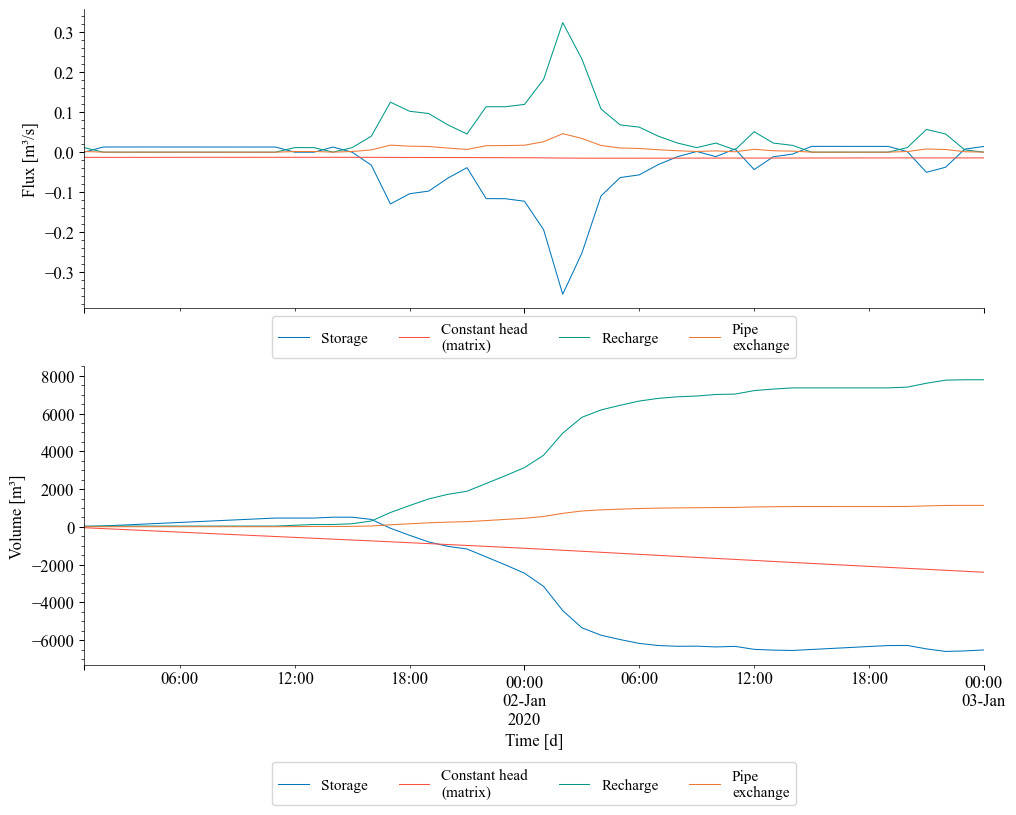

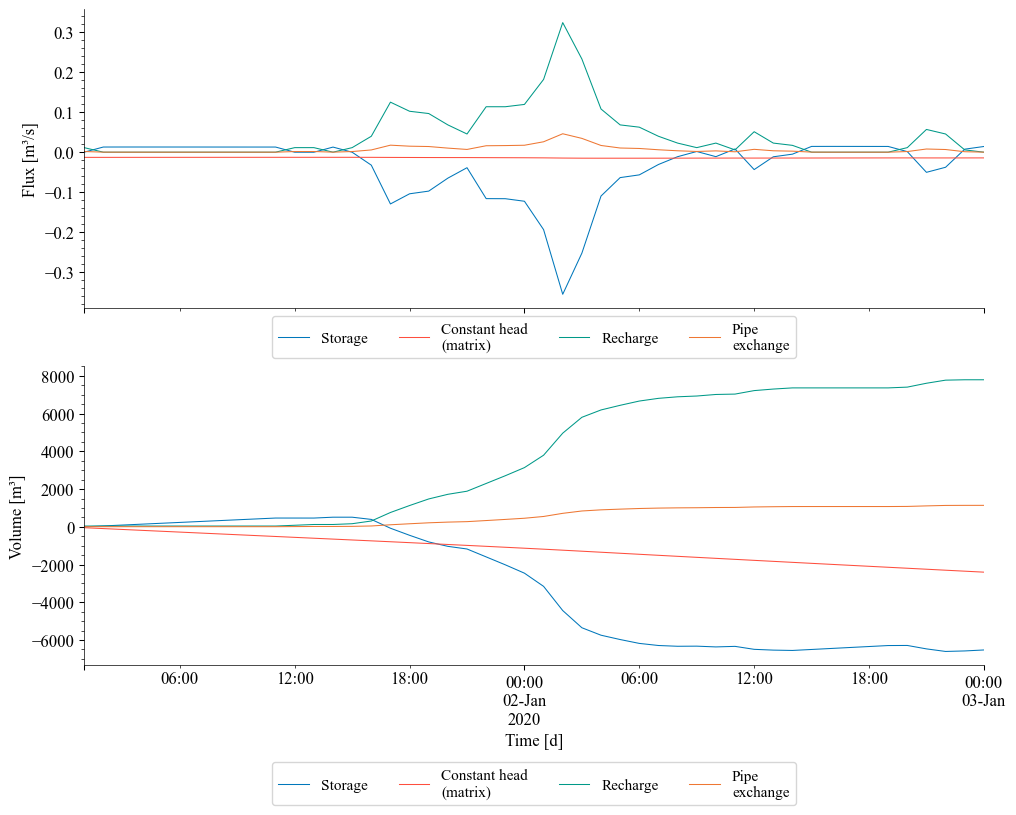

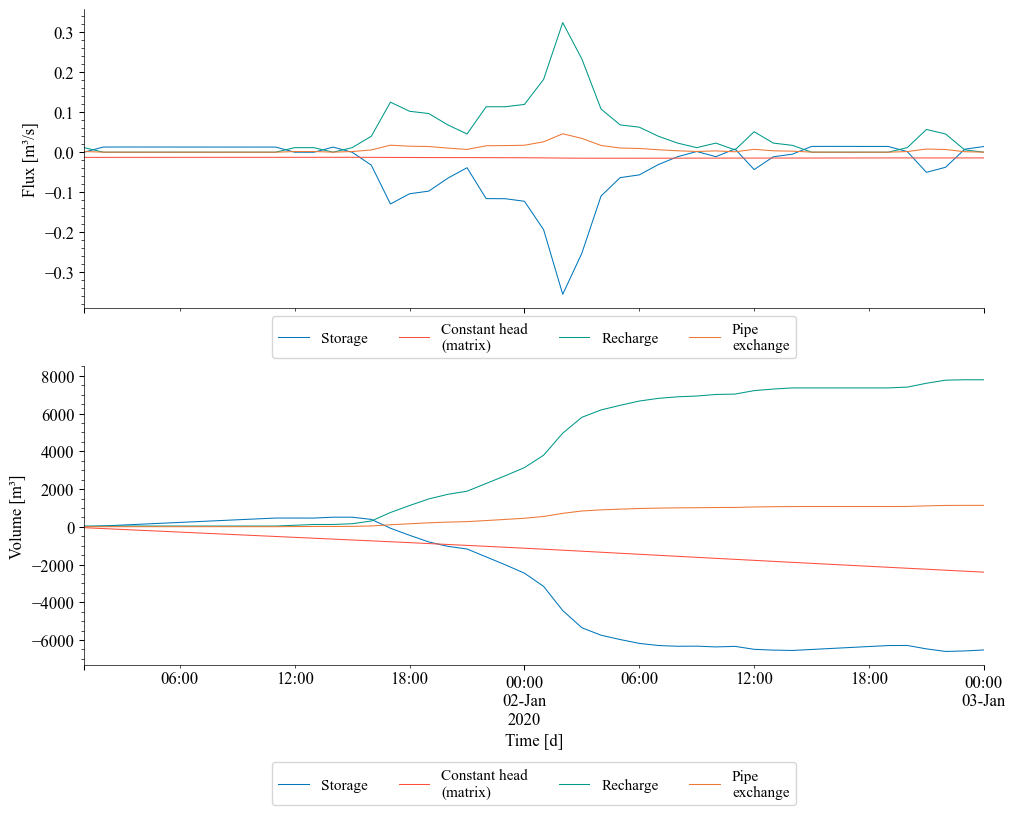

In [97]:
for i,folder in enumerate(folders):
    # Create a figure with two subplots for the fluxes and volumes
    fig, ax = plt.subplots(figsize=(10,8), nrows= 2, ncols =1, sharex=True)
    # Plot the fluxes
    gwb_dict[f'df_flux_delta_{folder}'].plot(ax=ax[0])
    ax[0].set_ylabel('Flux [m³/s]')
    ax[0].legend(bbox_to_anchor=(0.5, -0.), ncol=6, loc='upper center')
    # Plot the volumes
    gwb_dict[f'df_vol_delta_{folder}'].plot(ax=ax[1])
    ax[1].set_ylabel('Volume [m³]')
    plt.xlabel('Time [d]')
    ax[1].legend(bbox_to_anchor=(0.5, -0.3), ncol=6, loc='upper center')


### Plot the percentage discrepancy

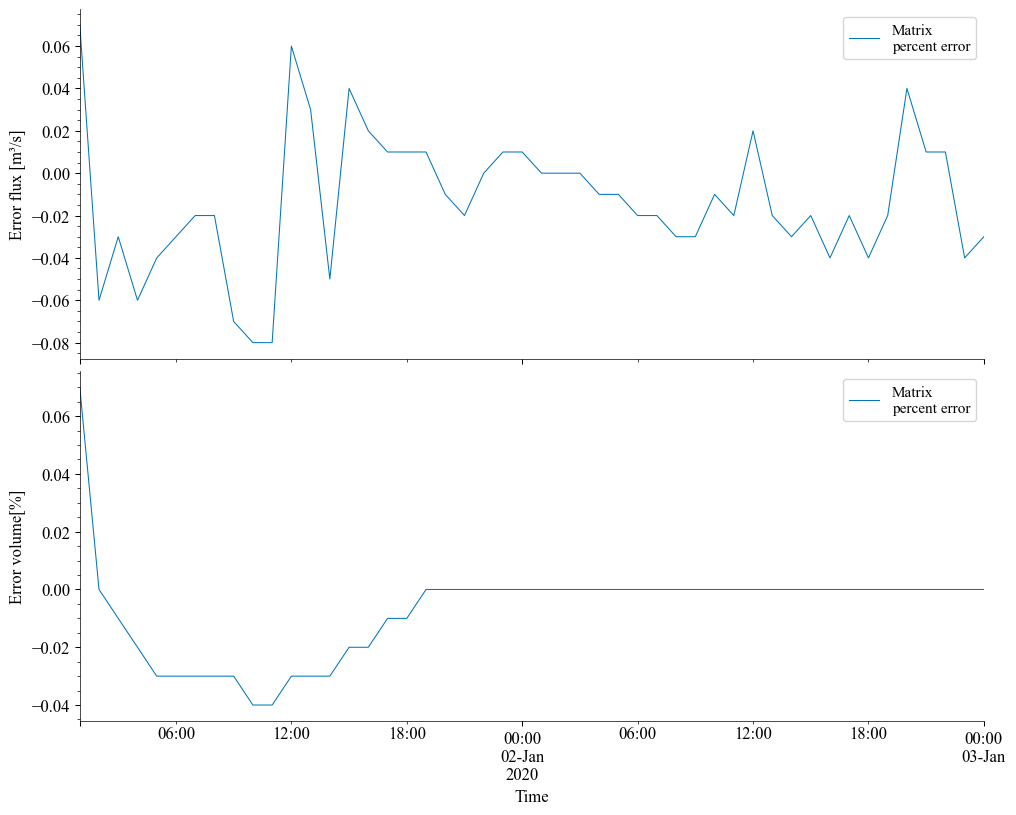

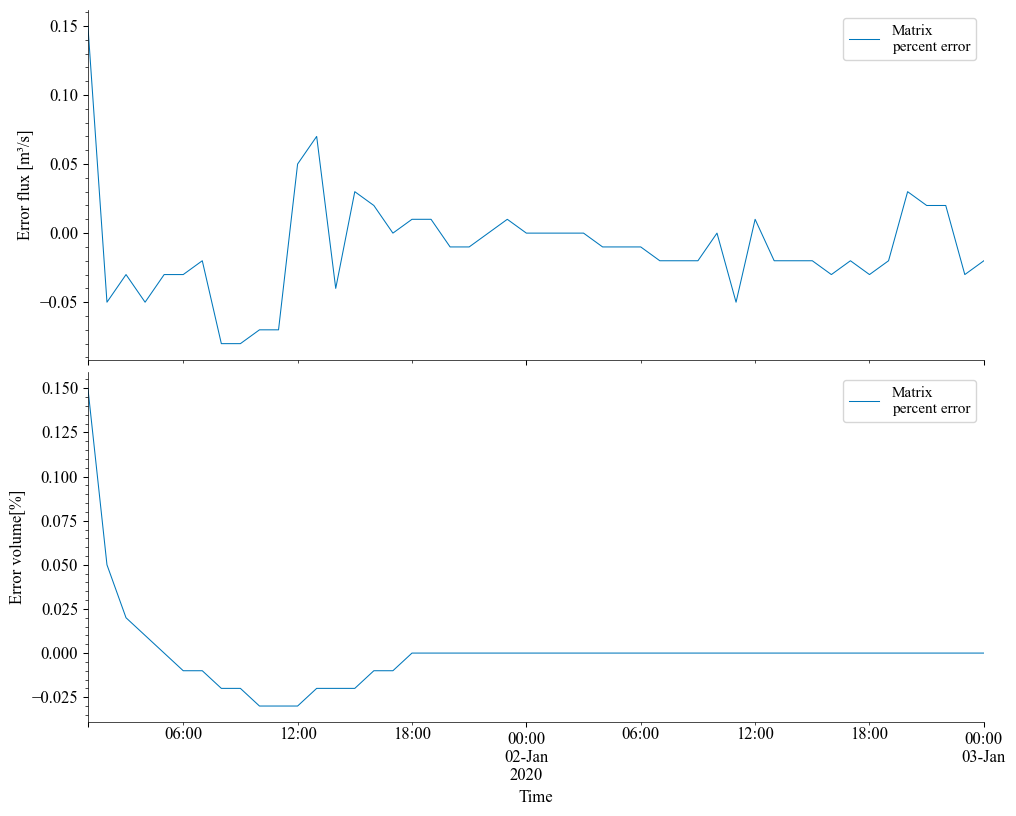

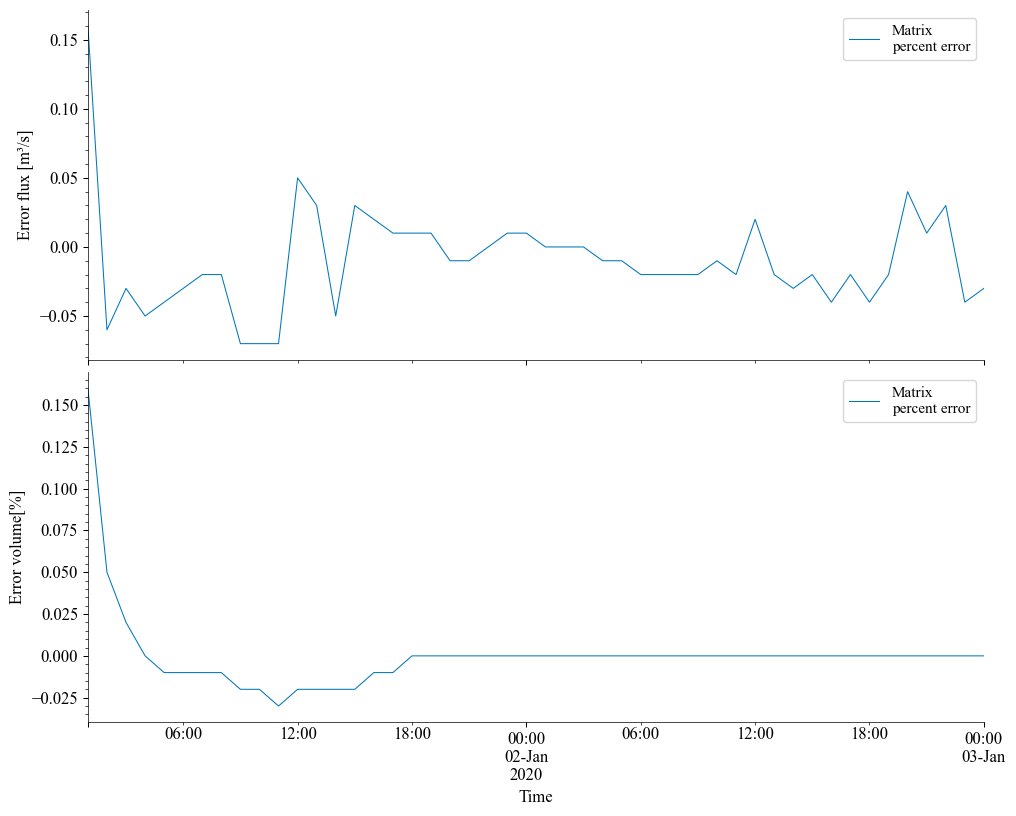

In [98]:
for i,folder in enumerate(folders):
    # Create a figure with two subplots for the errors of fluxes and volumes
    fig, ax = plt.subplots(figsize=(10,8), nrows= 2, ncols =1, sharex=True)
    # Plot the error of the fluxes
    gwb_dict[f'df_flux_per_{folder}'].plot(ax=ax[0])
    ax[0].set_ylabel('Error flux [m³/s]')
    # Plot the error of the volumes
    gwb_dict[f'df_vol_per_{folder}'].plot(ax=ax[1])
    plt.ylabel('Error volume[%]')
    plt.xlabel('Time')

### Multiple global water budgets

In [99]:
# Collect all global water budget information of the different model variants
mgwb_dict = multiple_gwb(mf, gwb_dict, folders)

In [100]:
# Show a multiple global water budget key dataframe
mgwb_dict['df_flux_per']

,Matrix\npercent error,Model,Stress period,Time
0,0.07,run_001,1,3600.0
1,0.15,run_002,1,3600.0
2,0.16,run_003,1,3600.0
3,-0.06,run_001,2,7200.0
4,-0.05,run_002,2,7200.0
...,...,...,...,...
139,-0.03,run_002,47,169200.0
140,-0.04,run_003,47,169200.0
141,-0.03,run_001,48,172800.0
142,-0.02,run_002,48,172800.0


Text(0.5, 0, 'Time [s]')

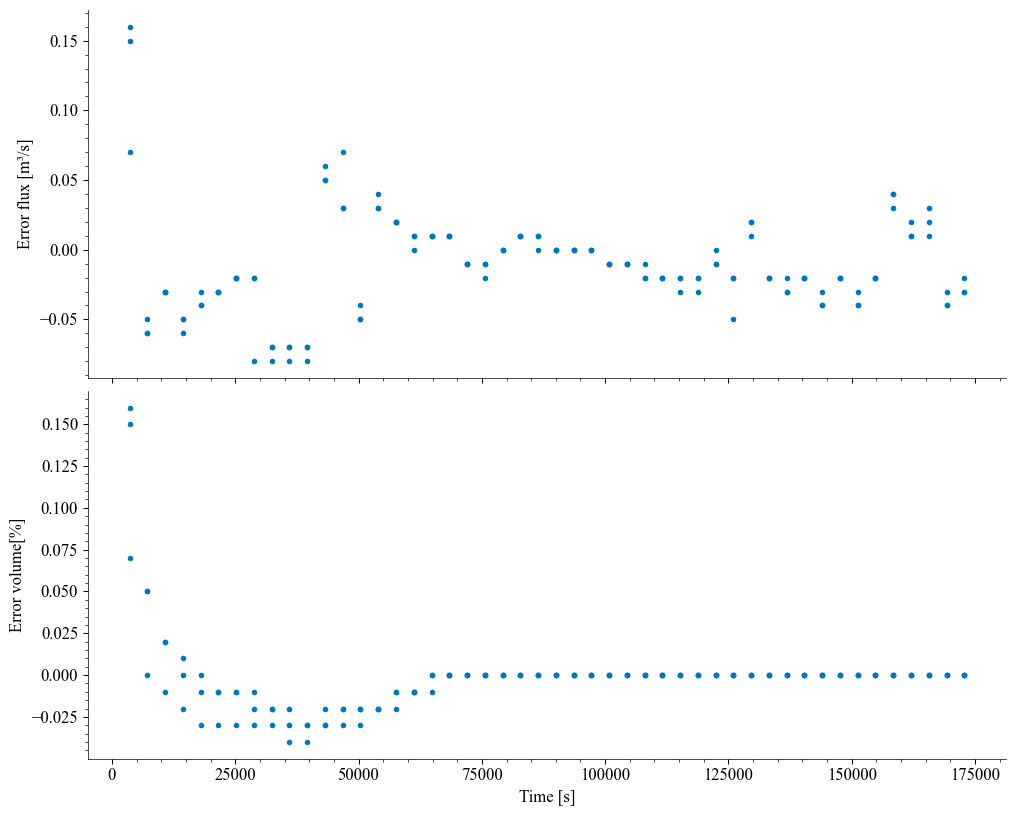

In [101]:
# Create a figure with two subplots for the errors of fluxes and volumes
fig, ax = plt.subplots(figsize=(10,8), nrows= 2, ncols =1, sharex=True)
x = mgwb_dict['df_flux_per']['Time']
y = mgwb_dict['df_flux_per']['Matrix\npercent error']
# Plot the error of the fluxes as points
ax[0].plot(x, y, marker = '.', linewidth=0)
ax[0].set_ylabel('Error flux [m³/s]')

x = mgwb_dict['df_vol_per']['Time']
y = mgwb_dict['df_vol_per']['Matrix\npercent error']
# Plot the error of the volumes as points
ax[1].plot(x, y, marker = '.', linewidth=0)
plt.ylabel('Error volume[%]')
plt.xlabel('Time [s]')

In [102]:
# Rename columns of the multiple global water budget dictionary
new = {'RIVER_LEAKAGE': 'River'}
for key, df in mgwb_dict.items():
     mgwb_dict[key], names = rename_gwb_col_df(df = df, new = new)
     # Delete the column "Model" (This is not necessary)
     try:
          mgwb_dict[key].drop('Model', axis=1, inplace=True)
     except:
          pass

In [103]:
# Calculate statistic values for the global balance for all models
data_dict_temp = statistics_mgwb(mgwb_dict)
# Update the multiple global water budget dictionary (Add the statistic data)
mgwb_dict.update(data_dict_temp)

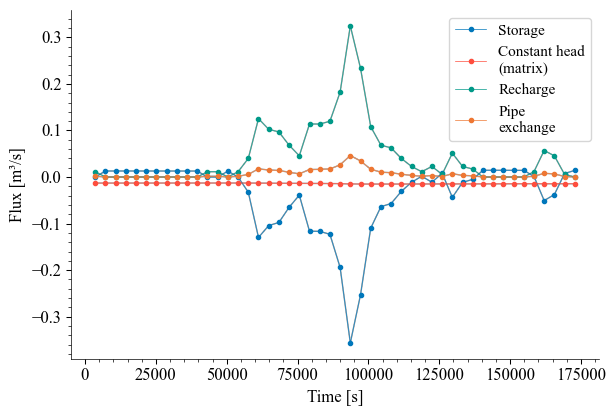

In [104]:
# Plot the range between the minimum and maximum delta fluxes (IN-OUT)
fig, ax = plt.subplots(figsize=(6,4), nrows= 1, ncols =1)
# Plot the mean fluxes
data = mgwb_dict['df_flux_delta_mean_t']
plt.plot(data.index, data, marker = '.', linewidth=0.5, label = data.columns)
# Create the range between the minimum and maximum fluxes
data_min = mgwb_dict['df_flux_delta_min_t']
data_max = mgwb_dict['df_flux_delta_max_t']
for col in data_min.columns:
    vertices = np.column_stack([data.index, data_max[col]])
    vertices = np.vstack([vertices,
                           np.flipud(np.column_stack([data.index,#
                                                      data_min[col]]))])
    # Fill the area between the curves
    plt.fill(*vertices.T, alpha=0.5, color = 'grey')
# x and y axis labels and legend
plt.xlabel('Time [s]')
plt.ylabel('Flux [m³/s]')
plt.legend()

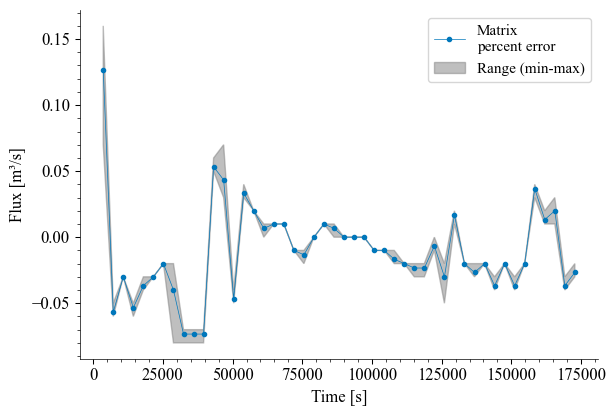

In [105]:
# Plot the range between the minimum and maximum of the matrix percent error
fig, ax = plt.subplots(figsize=(6,4), nrows= 1, ncols =1)
# Plot the mean of the matrix percent error
data = mgwb_dict['df_flux_per_mean_t']
plt.plot(data.index, data, marker = '.', linewidth=0.5,  
         label = data.columns[0])
# Create the range between the minimum and maximum fluxes
data_min = mgwb_dict['df_flux_per_min_t']
data_max = mgwb_dict['df_flux_per_max_t']
for col in data_min.columns:
    vertices = np.column_stack([data.index, data_max[col]])
    vertices = np.vstack([vertices,
                           np.flipud(np.column_stack([data.index,#
                                                      data_min[col]]))])
    # Fill the area between the curves
    plt.fill(*vertices.T, alpha=0.5, color = 'gray', label = 'Range (min-max)')
# x and y axis labels and legend
plt.xlabel('Time [s]')
plt.ylabel('Flux [m³/s]')
plt.legend()